## This notebook is created to compare baseline pupil values across the first participants of the study. 

#### The data in this notebook is all raw and (yet) not pre-processed.

**author**: Jordy van Langen, February 2020   
**e-mail**: jordy.vanlangen@sydney.edu.au



### 1. Participant 001 - Freezer 

- baseline_tvscreen (2 min)
- baseline_laptop (2 min)


### 2. Participant 002 - non-freezer

- baseline_tvsceen (2 min)
- baseline_laptop (2min)     


### 3. Participant 003 - TO BE DONE

- baseline_tvscreen (2min)
- baseline_laptop (2min)


In [1]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Define pre-settings
path = '/Volumes/BMRI/CRU/Parkinsons/Jordy/data/'
subject = ["001","002"]
condition = ["/seated_vr", "/gaitmat"]
pupil = ["/pupil"]
baseline_task = ["/baseline", "/task"]
device = ["/tv", "/laptop"]
file = ["pupil_positions", "annotations"]

## Load the data

- pupil_positions.csv 
- annotations.csv

In [3]:
# 001
df_001_tv = pd.read_csv(path + subject[0] + condition[0] + pupil[0] + baseline_task[0] + device[0] + '/exports/000/' + file[0] + '.csv')
df_001_laptop = pd.read_csv(path + subject[0] + condition[0] + pupil[0] + baseline_task[0] + device[1] + '/exports/000/' + file[0] + '.csv')

df_annotations_001_tv = pd.read_csv(path + subject[0] + condition[0] + pupil[0] + baseline_task[0] + device[0] + '/exports/000/' + file[1] + '.csv')
df_annotations_001_laptop = pd.read_csv(path + subject[0] + condition[0] + pupil[0] + baseline_task[0] + device[1] + '/exports/000/' + file[1] + '.csv')


# 002
df_002_tv = pd.read_csv(path + subject[1] + condition[0] + pupil[0] + baseline_task[0] + device[0] + '/exports/000/' + file[0] + '.csv')
df_002_laptop = pd.read_csv(path + subject[1] + condition[0] + pupil[0] + baseline_task[0] + device[1] + '/exports/000/' + file[0] + '.csv')

df_annotations_002_tv = pd.read_csv(path + subject[1] + condition[0] + pupil[0] + baseline_task[0] + device[0] + '/exports/000/' + file[1] + '.csv')
df_annotations_002_laptop = pd.read_csv(path + subject[1] + condition[0] + pupil[0] + baseline_task[0] + device[1] + '/exports/000/' + file[1] + '.csv')



# 003














### An example of how these datasets look like 

- It just shows the first and last 30 rows
- For pre-processing we would be interested in the following columns:
    - **timestamp** (The timestamp at which the sample was recorded)
    - **id** (Identifies the eye to which the sample belongs to. By default samples with id = 0 belong to the right eye, while samples with id = 1 belong to the left eye (from the wearer's POV!).
    - **confidence** (i.e. how well the pupil was captured, which ranges from 0.0 % to 100%
    - **norm_pox_x** & **norm_pos_y** (The normalized position of the pupil in the eye image. (0,0) is bottom left corner of the eye image frame; (1,1) is the top right corner of the eye image frame)
    - **diameter** (pupil diameter in pixels)
    - **diameter_3d** (diameter of the pupil scaled to mm based on anthropomorphic avg eye ball diameter and corrected for perspective). Not shown in df_view due to the vast amount of columns (but it is in there).  

- Additionally we would have to incorporate the events as defined in the 'annotations.csv' file (but more on that later, because that is not really urgent for the visual inspection of the raw data).

#### Inspect raw data

- 001

In [4]:
df_001_tv

timestamp  index  id  confidence  norm_pos_x  norm_pos_y  \
0     -647943.888734      0   0    1.000000    0.645695    0.475002   
1     -647943.884800      0   1    1.000000    0.428246    0.550365   
2     -647943.880665      0   0    1.000000    0.645731    0.474862   
3     -647943.876731      0   1    1.000000    0.428371    0.551678   
4     -647943.872596      0   0    1.000000    0.645708    0.475966   
5     -647943.868662      0   1    1.000000    0.427969    0.550176   
6     -647943.864527      0   0    1.000000    0.645988    0.474284   
7     -647943.860593      0   1    1.000000    0.428418    0.549482   
8     -647943.856458      0   0    1.000000    0.646179    0.475403   
9     -647943.852524      0   1    1.000000    0.428638    0.550571   
10    -647943.848389      0   0    1.000000    0.645930    0.475712   
11    -647943.844455      0   1    1.000000    0.428302    0.549892   
12    -647943.840320      0   0    0.997176    0.645206    0.475195   
13    -647943.836386      0   1    1.000000    0.428036    0.549977   
14    -647943.832251      0   0    1.000000    0.645878    0.475475   
15    -647943.828317      0   1    1.000000    0.428348    0.550779   
16    -647943.824182      0   0    1.000000    0.646244    0.474903   
17    -647943.820248      0   1    1.000000    0.428664    0.550205   
18    -647943.816113      0   0    0.992317    0.645409    0.475066   
19    -647943.812179      0   1    1.000000    0.429031    0.550386   
20    -647943.808044      0   0    0.999575    0.645099    0.474613   
21    -647943.804110      0   1    1.000000    0.429063    0.549969   
22    -647943.799975      0   0    1.000000    0.644430    0.474302   
23    -647943.796041      0   1    1.000000    0.429372    0.550859   
24    -647943.791906      0   0    1.000000    0.644461    0.474925   
25    -647943.787972      0   1    1.000000    0.429100    0.550776   
26    -647943.783837      0   0    1.000000    0.644998    0.474679   
27    -647943.779903      0   1    1.000000    0.428568    0.550844   
28    -647943.775768      0   0    1.000000    0.644777    0.475381   
29    -647943.771834      0   1    1.000000    0.428748    0.551014   
...              ...    ...  ..         ...         ...         ...   
34316 -647804.298737   4137   1    0.207688    0.347405    0.375264   
34317 -647804.282599   4137   1    0.217768    0.340084    0.375482   
34318 -647804.274530   4137   1    0.197734    0.347566    0.383955   
34319 -647804.266460   4138   1    0.207683    0.333294    0.373698   
34320 -647804.250322   4138   1    0.187520    0.346551    0.394050   
34321 -647804.242253   4138   1    0.223293    0.351123    0.383130   
34322 -647804.234184   4139   1    0.242997    0.336770    0.375192   
34323 -647804.226115   4139   1    0.231567    0.344011    0.386178   
34324 -647804.218046   4139   1    0.231539    0.349651    0.395812   
34325 -647804.209977   4139   1    0.169644    0.507517    0.406553   
34326 -647804.201908   4139   1    0.248611    0.521899    0.416729   
34327 -647804.193839   4140   1    0.210982    0.507477    0.407841   
34328 -647804.185770   4140   1    0.220998    0.514779    0.400786   
34329 -647804.177701   4140   1    0.174206    0.329228    0.355100   
34330 -647804.169632   4140   1    0.104062    0.256844    0.485743   
34331 -647804.161563   4141   1    0.143960    0.268065    0.447872   
34332 -647804.153494   4141   1    0.141327    0.290749    0.423426   
34333 -647804.145425   4141   1    0.185119    0.292736    0.418372   
34334 -647804.137356   4141   1    0.169555    0.507256    0.412665   
34335 -647804.129287   4142   1    0.268027    0.497868    0.425100   
34336 -647804.121218   4142   1    0.208194    0.521754    0.417295   
34337 -647804.113149   4142   1    0.244789    0.507029    0.410757   
34338 -647804.105080   4142   1    0.201680    0.480871    0.442617   
34339 -647804.097011   4143   1    0.239116    0.505274    0.414286   
34340 -647804.088942   4143   1    

In [5]:
df_001_laptop

timestamp  index  id  confidence  norm_pos_x  norm_pos_y  \
0     -647471.637509      0   0    1.000000    0.533597    0.568061   
1     -647471.635979      0   1    1.000000    0.533519    0.534529   
2     -647471.629440      0   0    1.000000    0.533071    0.567826   
3     -647471.627910      0   1    1.000000    0.533030    0.534237   
4     -647471.621371      0   0    1.000000    0.533060    0.568148   
5     -647471.619841      0   1    1.000000    0.533322    0.534963   
6     -647471.613302      0   0    1.000000    0.532917    0.567692   
7     -647471.611772      0   1    1.000000    0.533316    0.534995   
8     -647471.605233      0   0    1.000000    0.532986    0.567522   
9     -647471.603703      0   1    1.000000    0.533078    0.535459   
10    -647471.597164      0   0    1.000000    0.532901    0.567371   
11    -647471.595634      0   1    1.000000    0.533252    0.534615   
12    -647471.589095      0   0    1.000000    0.532954    0.567685   
13    -647471.587565      0   1    1.000000    0.533211    0.534954   
14    -647471.581026      0   0    1.000000    0.533310    0.567502   
15    -647471.579496      0   1    1.000000    0.533120    0.534324   
16    -647471.572957      0   0    1.000000    0.532916    0.567693   
17    -647471.571427      0   1    1.000000    0.533584    0.535039   
18    -647471.564888      0   0    1.000000    0.532944    0.567371   
19    -647471.563358      0   1    1.000000    0.533498    0.534452   
20    -647471.556819      0   0    1.000000    0.533000    0.567792   
21    -647471.555289      0   1    1.000000    0.533465    0.535119   
22    -647471.548750      0   0    1.000000    0.533197    0.566976   
23    -647471.547220      0   1    1.000000    0.533765    0.535268   
24    -647471.540681      0   0    1.000000    0.533109    0.567007   
25    -647471.539151      0   1    1.000000    0.533102    0.535011   
26    -647471.532612      0   0    1.000000    0.533077    0.566985   
27    -647471.531082      0   1    1.000000    0.533714    0.534906   
28    -647471.524543      0   0    1.000000    0.532944    0.567230   
29    -647471.523013      0   1    1.000000    0.533118    0.534944   
...              ...    ...  ..         ...         ...         ...   
31732 -647341.096833   3807   0    1.000000    0.367890    0.627160   
31733 -647341.088763   3807   0    1.000000    0.367944    0.627574   
31734 -647341.080694   3807   0    1.000000    0.368717    0.628083   
31735 -647341.079154   3807   1    0.037003    0.511693    0.475536   
31736 -647341.072625   3807   0    1.000000    0.368537    0.627475   
31737 -647341.071085   3807   1    0.053081    0.904570    0.729680   
31738 -647341.064556   3808   0    1.000000    0.368698    0.627538   
31739 -647341.063016   3808   1    0.053049    0.901359    0.731271   
31740 -647341.056487   3808   0    1.000000    0.369485    0.626667   
31741 -647341.054947   3808   1    0.056346    0.846536    0.748538   
31742 -647341.048418   3808   0    1.000000    0.369358    0.626035   
31743 -647341.046878   3808   1    0.061036    0.643576    0.872848   
31744 -647341.040349   3808   0    1.000000    0.370016    0.626173   
31745 -647341.038809   3808   1    0.010877    1.039725    0.655778   
31746 -647341.032280   3809   0    1.000000    0.369504    0.626379   
31747 -647341.030740   3809   1    0.051728    1.027080    0.609088   
31748 -647341.024211   3809   0    1.000000    0.369976    0.625864   
31749 -647341.022671   3809   1    0.055759    1.031493    0.591068   
31750 -647341.016142   3809   0    1.000000    0.370556    0.626437   
31751 -647341.014602   3809   1    0.063400    0.669113    0.884981   
31752 -647341.008073   3809   0    1.000000    0.369886    0.628030   
31753 -647341.006533   3809   1    0.046370    0.489049    0.760767   
31754 -647341.000004   3810   0    1.000000    0.368247    0.628399   
31755 -647340.998464   3810   1    0.007620    0.413206    0.402914   
31756 -647340.990395   3810   1    

In [6]:
df_annotations_001_tv

index    timestamp           label  duration  added_in_player     subject
0    400 -647930.2169  baseline_start         0             True  annotation
1   4040 -647807.5019    baseline_end         0             True  annotation

In [7]:
df_annotations_001_laptop

index    timestamp           label  duration  added_in_player     subject
0    124 -647466.7823  baseline_start         0             True  annotation
1   3724 -647343.8661    baseline_end         0             True  annotation

#### Inspect raw data

- 002

In [8]:
df_002_tv

timestamp  index  id  confidence  norm_pos_x  norm_pos_y  \
0      230688.729933      0   1    1.000000    0.565004    0.551745   
1      230688.732666      0   0    1.000000    0.631144    0.449994   
2      230688.746071      0   1    1.000000    0.567482    0.550652   
3      230688.748804      0   0    1.000000    0.631844    0.451901   
4      230688.756873      0   0    1.000000    0.634318    0.453160   
5      230688.762210      0   1    1.000000    0.570114    0.545654   
6      230688.770279      0   1    1.000000    0.571413    0.542277   
7      230688.773011      0   0    1.000000    0.637442    0.458519   
8      230688.778348      0   1    1.000000    0.574319    0.539406   
9      230688.786417      0   1    1.000000    0.575642    0.536474   
10     230688.789149      0   0    1.000000    0.638052    0.464768   
11     230688.794486      0   1    0.484753    0.577466    0.541087   
12     230688.797218      0   0    1.000000    0.640168    0.464727   
13     230688.805287      0   0    0.147815    0.647011    0.510041   
14     230688.810624      0   1    0.000000    0.500000    0.500000   
15     230688.818693      0   1    0.000000    0.500000    0.500000   
16     230688.821425      0   0    0.153276    0.672660    0.586758   
17     230688.829495      0   0    0.258253    0.644115    0.608048   
18     230688.834831      0   1    0.000000    0.500000    0.500000   
19     230688.837564      0   0    0.206718    0.668361    0.635492   
20     230688.842900      0   1    0.000000    0.500000    0.500000   
21     230688.850969      0   1    0.000000    0.500000    0.500000   
22     230688.853702      0   0    0.190725    0.704060    0.582458   
23     230688.861771      0   0    0.231978    0.674212    0.630601   
24     230688.867107      0   1    0.000000    0.500000    0.500000   
25     230688.875176      0   1    0.000000    0.500000    0.500000   
26     230688.877909      0   0    0.278935    0.661518    0.579905   
27     230688.885978      0   0    0.393626    0.655246    0.580404   
28     230688.891314      0   1    0.070949    0.579018    0.537385   
29     230688.899383      0   1    0.074229    0.580903    0.541869   
...              ...    ...  ..         ...         ...         ...   
23739  230821.538016   3712   1    1.000000    0.609845    0.589399   
23740  230821.540749   3712   0    1.000000    0.602591    0.424127   
23741  230821.548818   3712   0    1.000000    0.602387    0.424282   
23742  230821.554154   3712   1    1.000000    0.608809    0.589051   
23743  230821.556887   3712   0    1.000000    0.602203    0.424719   
23744  230821.570292   3713   1    1.000000    0.609077    0.589427   
23745  230821.573025   3713   0    1.000000    0.602217    0.424121   
23746  230821.578361   3713   1    1.000000    0.608775    0.589146   
23747  230821.581094   3713   0    1.000000    0.602031    0.424762   
23748  230821.589163   3713   0    1.000000    0.602251    0.423939   
23749  230821.594499   3713   1    1.000000    0.609579    0.589784   
23750  230821.597232   3714   0    1.000000    0.601788    0.424274   
23751  230821.602568   3714   1    1.000000    0.609139    0.590051   
23752  230821.605301   3714   0    1.000000    0.601919    0.423324   
23753  230821.613370   3714   0    1.000000    0.601817    0.423705   
23754  230821.618706   3714   1    1.000000    0.608445    0.589450   
23755  230821.621439   3714   0    1.000000    0.601863    0.424103   
23756  230821.626775   3714   1    1.000000    0.610073    0.590117   
23757  230821.629508   3714   0    1.000000    0.601644    0.424717   
23758  230821.642913   3715   1    1.000000    0.610039    0.589667   
23759  230821.645646   3715   0    1.000000    0.600533    0.424343   
23760  230821.650982   3715   1    1.000000    0.610088    0.589450   
23761  230821.653715   3715   0    1.000000    0.601301    0.424724   
23762  230821.659051   3715   1    1.000000    0.610292    0.589523   
23763  230821.661784   3715   0    

In [117]:
df_002_laptop

timestamp  index  id  confidence  norm_pos_x  norm_pos_y  diameter  \
0     231181.354      0   0       1.000       0.565       0.557    40.799   
1     231181.370      0   0       0.634       0.554       0.550    41.458   
2     231181.378      0   0       1.000       0.564       0.558    41.064   
3     231181.386      0   0       1.000       0.564       0.557    40.949   
4     231181.402      0   0       0.607       0.558       0.557    40.882   
5     231181.410      0   0       0.570       0.571       0.557    41.494   
6     231181.418      0   0       0.597       0.570       0.557    41.313   
7     231181.427      0   0       0.639       0.570       0.557    41.309   
8     231181.443      0   0       0.596       0.570       0.557    41.404   
9     231181.451      0   0       1.000       0.564       0.557    40.933   
10    231181.467      0   0       0.635       0.553       0.550    41.442   
11    231181.475      0   0       0.626       0.554       0.551    41.450   
12    231181.483      0   0       0.595       0.571       0.558    41.460   
13    231181.491      0   0       1.000       0.564       0.557    40.943   
14    231181.499      0   0       1.000       0.565       0.557    40.718   
15    231181.507      0   0       1.000       0.564       0.557    40.988   
16    231181.515      0   0       1.000       0.564       0.556    40.915   
17    231181.523      0   0       1.000       0.565       0.557    41.056   
18    231181.531      0   0       0.591       0.565       0.557    40.676   
19    231181.539      0   0       1.000       0.564       0.556    40.969   
20    231181.548      0   0       1.000       0.564       0.556    40.990   
21    231181.556      0   0       1.000       0.565       0.556    40.790   
22    231181.564      0   0       1.000       0.565       0.556    41.005   
23    231181.572      0   0       1.000       0.564       0.557    40.825   
24    231181.580      0   0       0.562       0.570       0.564    41.433   
25    231181.588      0   0       1.000       0.565       0.556    40.879   
26    231181.596      0   0       1.000       0.564       0.556    41.097   
27    231181.604      0   0       1.000       0.564       0.556    40.836   
28    231181.612      0   0       1.000       0.565       0.556    40.918   
29    231181.620      0   0       1.000       0.565       0.556    40.961   
...          ...    ...  ..         ...         ...         ...       ...   
17383 231310.731   3704   1       0.832       0.745       0.554    47.592   
17384 231310.741   3704   0       1.000       0.366       0.568    34.061   
17385 231310.748   3704   1       0.847       0.745       0.555    47.379   
17386 231310.749   3704   0       1.000       0.367       0.566    33.523   
17387 231310.756   3704   1       0.805       0.745       0.555    47.612   
17388 231310.757   3704   0       1.000       0.368       0.566    33.730   
17389 231310.765   3705   0       1.000       0.368       0.567    34.163   
17390 231310.772   3705   1       0.831       0.746       0.556    47.605   
17391 231310.773   3705   0       1.000       0.368       0.566    34.191   
17392 231310.780   3705   1       0.000       0.500       0.500     0.000   
17393 231310.781   3705   0       1.000       0.367       0.566    34.492   
17394 231310.788   3705   1       0.811       0.745       0.556    47.051   
17395 231310.789   3705   0       1.000       0.368       0.566    34.781   
17396 231310.796   3706   1       0.759       0.744       0.555    46.725   
17397 231310.797   3706   0       1.000       0.368       0.566    34.209   
17398 231310.805   3706   0       1.000       0.367       0.565    34.318   
17399 231310.812   3706   1       0.807       0.743       0.556    46.965   
17400 231310.813   3706   0       1.000       0.366       0.565    34.636   
17401 231310.821   3706   0       1.000       0.366       0.564    35.012   
17402 231310.828   3707   1       0.828       0.743       0.557    47.581   
174

In [9]:
df_annotations_002_tv

index    timestamp           label  duration  added_in_player     subject
0    149  230694.6426  baseline_start         0             True  annotation
1   3605  230817.3912    baseline_end         0             True  annotation

In [10]:
df_annotations_002_laptop

index    timestamp           label  duration  added_in_player     subject
0     92  231185.5803  baseline_start         0             True  annotation
1   3623  231308.0273    baseline_end         0             True  annotation

## Next step: inspect and filter the raw dataset according to the following criteria.


 - **timestamp** (The timestamp at which the sample was recorded)
 - **id** (Identifies the eye to which the sample belongs to. By default samples with id = 0 belong to the right eye, while samples with id = 1 belong to the left eye (from the wearer's POV!).
 - **confidence** (i.e. how well the pupil was captured, which ranges from 0.0 % to 100%
 - **norm_pox_x** & **norm_pos_y** (The normalized position of the pupil in the eye image. (0,0) is bottom left corner of the eye image frame; (1,1) is the top right corner of the eye image frame)
 - **diameter** (pupil diameter in pixels)
 - **diameter_3d** (diameter of the pupil scaled to mm based on anthropomorphic avg eye ball diameter and corrected for perspective). Not shown in df_view due to the vast amount of columns (but it is in there).

- 001 TV

In [11]:
df_001_tv_eye_r = df_001_tv[df_001_tv.id == 0]
df_001_tv_eye_l = df_001_tv[df_001_tv.id == 1]
pd.options.display.float_format = '{:.3f}'.format

print("Right eye data:")
print(df_001_tv_eye_r[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

print("Left eye data:")
print(df_001_tv_eye_l[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

Right eye data:
     timestamp  id  confidence  norm_pos_x  norm_pos_y  diameter  diameter_3d
0  -647943.889   0       1.000       0.646       0.475    26.044        3.096
2  -647943.881   0       1.000       0.646       0.475    26.102        3.103
4  -647943.873   0       1.000       0.646       0.476    25.935        3.083
6  -647943.865   0       1.000       0.646       0.474    26.132        3.107
8  -647943.856   0       1.000       0.646       0.475    26.106        3.104
10 -647943.848   0       1.000       0.646       0.476    26.037        3.095
12 -647943.840   0       0.997       0.645       0.475    25.872        3.076
14 -647943.832   0       1.000       0.646       0.475    26.009        3.092
16 -647943.824   0       1.000       0.646       0.475    26.358        3.134
18 -647943.816   0       0.992       0.645       0.475    25.918        3.081
20 -647943.808   0       1.000       0.645       0.475    25.816        3.070
22 -647943.800   0       1.000       0.644      

- 001 laptop

In [12]:
df_001_laptop_eye_r = df_001_laptop[df_001_laptop.id == 0]
df_001_laptop_eye_l = df_001_laptop[df_001_laptop.id == 1]
pd.options.display.float_format = '{:.3f}'.format

print("Right eye data:")
print(df_001_laptop_eye_r[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

print("Left eye data:")
print(df_001_laptop_eye_l[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

Right eye data:
     timestamp  id  confidence  norm_pos_x  norm_pos_y  diameter  diameter_3d
0  -647471.638   0       1.000       0.534       0.568    33.585        3.991
2  -647471.629   0       1.000       0.533       0.568    33.901        4.029
4  -647471.621   0       1.000       0.533       0.568    33.849        4.023
6  -647471.613   0       1.000       0.533       0.568    34.017        4.043
8  -647471.605   0       1.000       0.533       0.568    33.885        4.028
10 -647471.597   0       1.000       0.533       0.567    34.128        4.057
12 -647471.589   0       1.000       0.533       0.568    33.969        4.038
14 -647471.581   0       1.000       0.533       0.568    34.065        4.049
16 -647471.573   0       1.000       0.533       0.568    34.189        4.064
18 -647471.565   0       1.000       0.533       0.567    34.194        4.064
20 -647471.557   0       1.000       0.533       0.568    34.290        4.076
22 -647471.549   0       1.000       0.533      

- 002 TV

In [13]:
df_002_tv_eye_r = df_002_tv[df_002_tv.id == 0]
df_002_tv_eye_l = df_002_tv[df_002_tv.id == 1]
pd.options.display.float_format = '{:.3f}'.format

print("Right eye data:")
print(df_002_tv_eye_r[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

print("Left eye data:")
print(df_002_tv_eye_l[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

Right eye data:
    timestamp  id  confidence  norm_pos_x  norm_pos_y  diameter  diameter_3d
1  230688.733   0       1.000       0.631       0.450    24.199        2.877
3  230688.749   0       1.000       0.632       0.452    24.156        2.870
4  230688.757   0       1.000       0.634       0.453    24.293        2.884
7  230688.773   0       1.000       0.637       0.459    24.303        2.880
10 230688.789   0       1.000       0.638       0.465    23.804        2.816
12 230688.797   0       1.000       0.640       0.465    23.640        2.795
13 230688.805   0       0.148       0.647       0.510    24.041        2.812
16 230688.821   0       0.153       0.673       0.587    24.179        2.786
17 230688.829   0       0.258       0.644       0.608    23.599        2.724
19 230688.838   0       0.207       0.668       0.635    24.098        2.764
22 230688.854   0       0.191       0.704       0.582    24.495        2.812
23 230688.862   0       0.232       0.674       0.631    24.

- 002 laptop

In [14]:
df_002_laptop_eye_r = df_002_laptop[df_002_laptop.id == 0]
df_002_laptop_eye_l = df_002_laptop[df_002_laptop.id == 1]
pd.options.display.float_format = '{:.3f}'.format

print("Right eye data:")
print(df_002_laptop_eye_r[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

print("Left eye data:")
print(df_002_laptop_eye_l[['timestamp', 'id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','diameter_3d']][:20])

Right eye data:
    timestamp  id  confidence  norm_pos_x  norm_pos_y  diameter  diameter_3d
0  231181.354   0       1.000       0.565       0.557    40.799        3.451
1  231181.370   0       0.634       0.554       0.550    41.458        3.517
2  231181.378   0       1.000       0.564       0.558    41.064        3.474
3  231181.386   0       1.000       0.564       0.557    40.949        3.464
4  231181.402   0       0.607       0.558       0.557    40.882        3.463
5  231181.410   0       0.570       0.571       0.557    41.494        3.507
6  231181.418   0       0.597       0.570       0.557    41.313        3.492
7  231181.427   0       0.639       0.570       0.557    41.309        3.492
8  231181.443   0       0.596       0.570       0.557    41.404        3.500
9  231181.451   0       1.000       0.564       0.557    40.933        3.463
10 231181.467   0       0.635       0.553       0.550    41.442        3.516
11 231181.475   0       0.626       0.554       0.551    41.

# Visualize pupil diameter (pixels - 2d) data

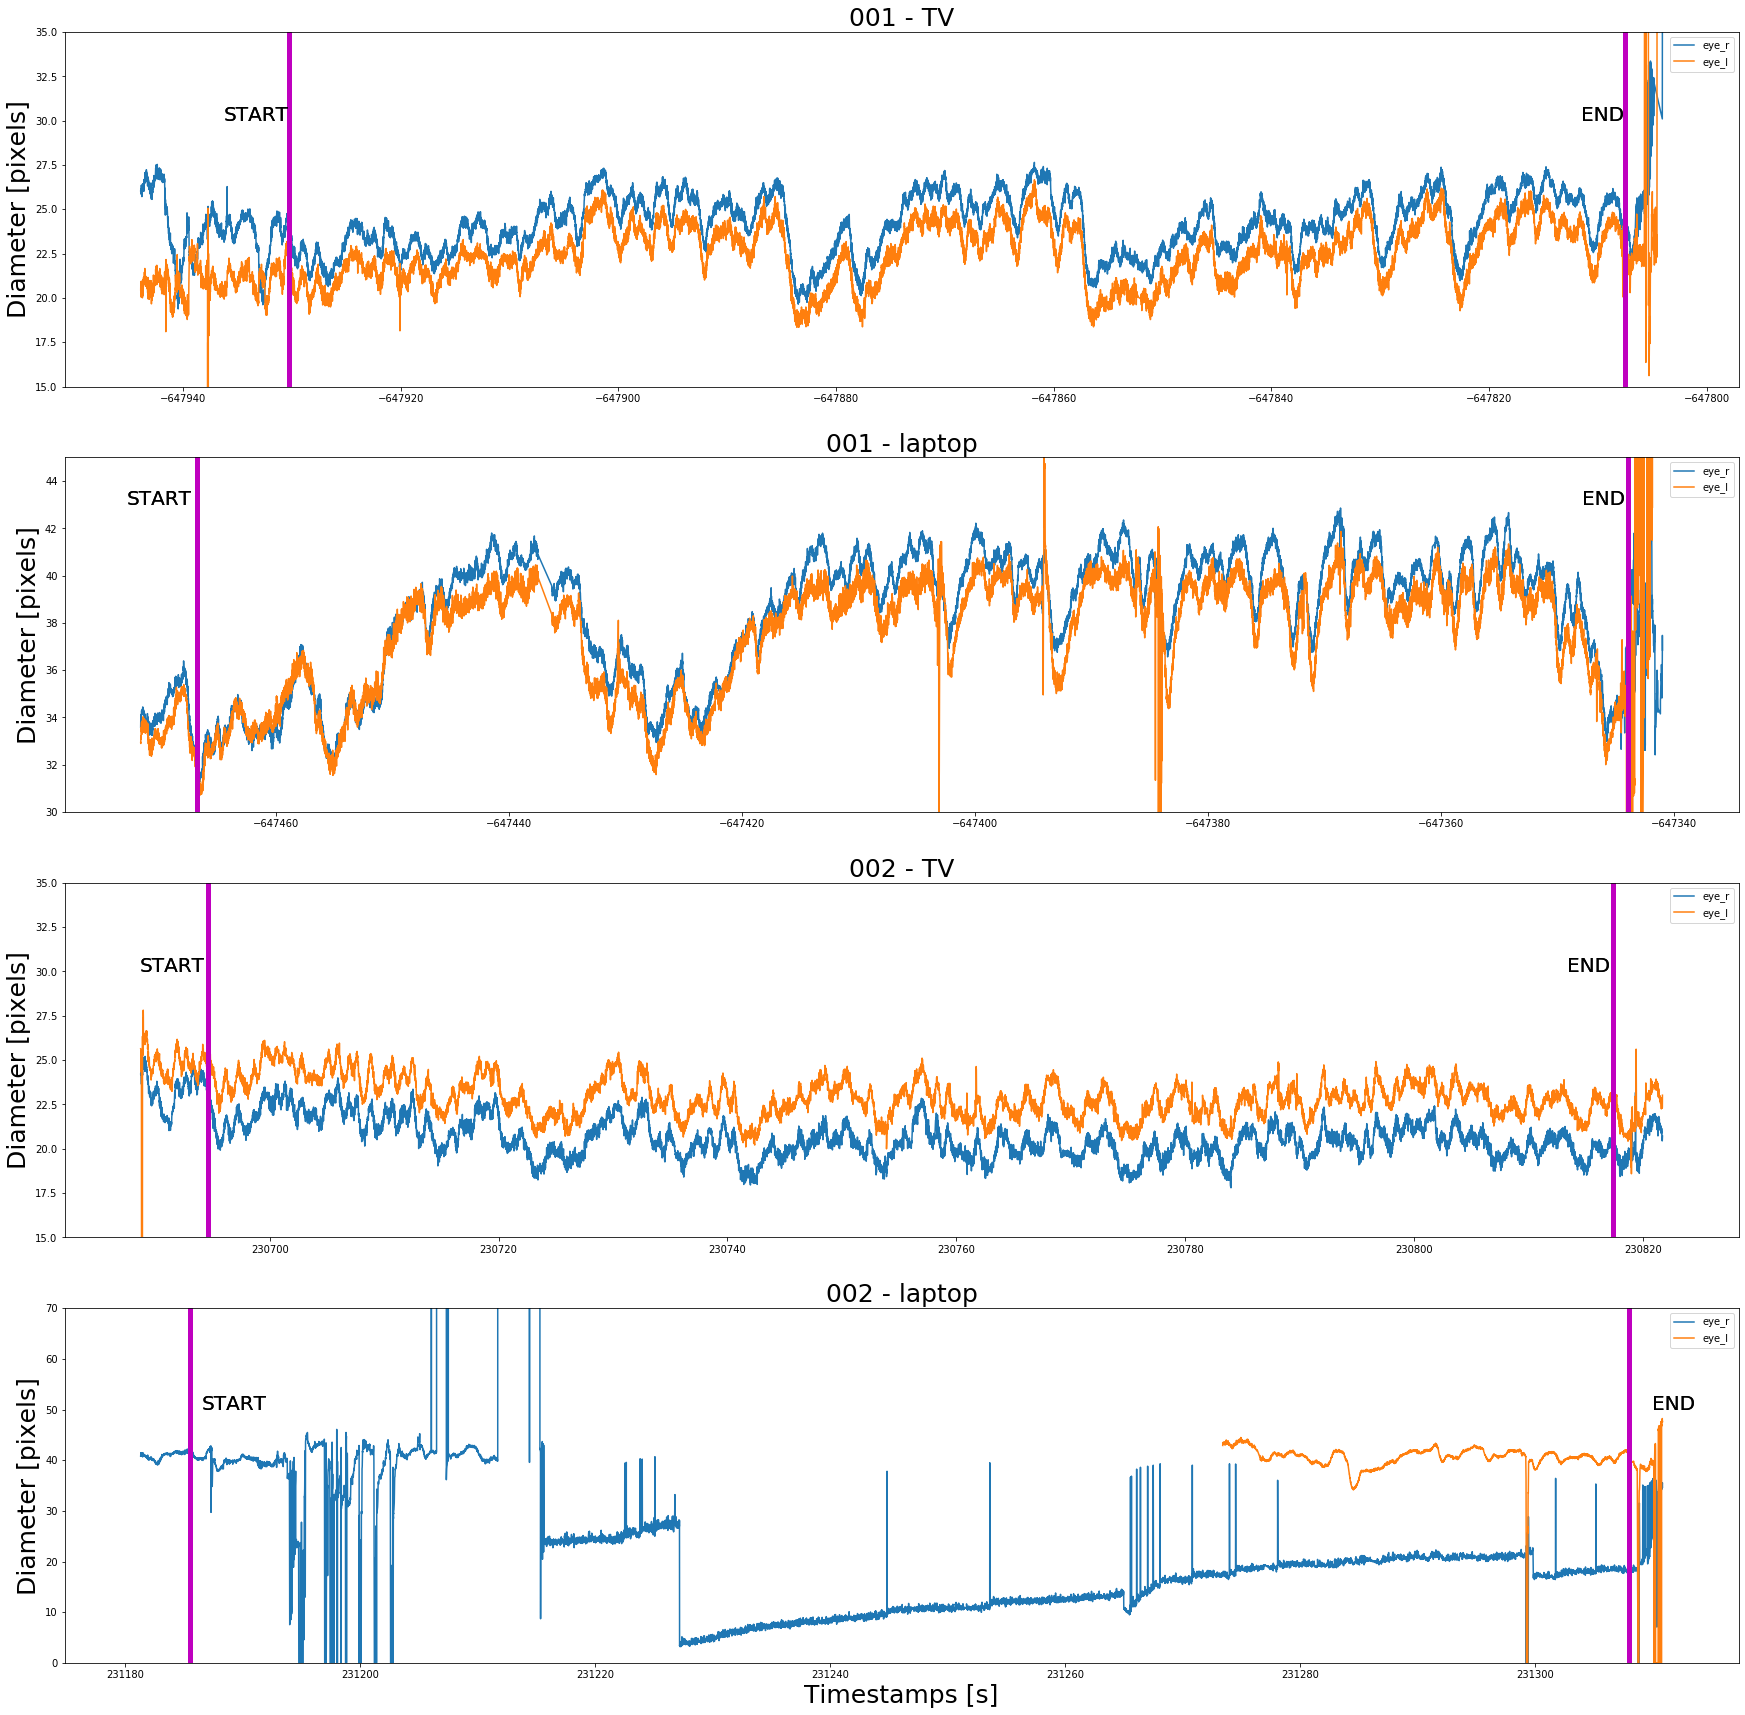

In [15]:
#pre-defined settings
fig = plt.figure(figsize=(30,30))
size_axes = 25;
size_title = 25;

########################################### Plot figure 1 ############################################################
ax = fig.add_subplot(411)
plt.plot(df_001_tv_eye_r['timestamp'], df_001_tv_eye_r['diameter'])
plt.plot(df_001_tv_eye_l['timestamp'], df_001_tv_eye_l['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('001 - TV', size = size_title)
plt.ylim(15,35) #adjusted the ylim manually due to default very wide zoom

#Add vertical lines to indicate start and end of fixation cross
select_start_001_tv = df_001_tv_eye_r.loc[(df_001_tv_eye_r['index'] == df_annotations_001_tv.iloc[0,0])]
select_end_001_tv = df_001_tv_eye_r.loc[(df_001_tv_eye_r['index'] == df_annotations_001_tv.iloc[1,0])]
timestamp_start_001_tv = select_start_001_tv.iloc[0,0]
timestamp_end_001_tv = select_end_001_tv.iloc[0,0]

xcoords_001_tv = [timestamp_start_001_tv, timestamp_end_001_tv]
colors = ['m','m']

for xc,c in zip(xcoords_001_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_tv-6,30,'START', fontsize = 20)
    plt.text(timestamp_end_001_tv-4,30,'END', fontsize = 20)

########################################### Plot figure 2 ############################################################
ax = fig.add_subplot(412)
plt.plot(df_001_laptop_eye_r['timestamp'], df_001_laptop_eye_r['diameter'])
plt.plot(df_001_laptop_eye_l['timestamp'], df_001_laptop_eye_l['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('001 - laptop', size = size_title)
plt.ylim(30,45) #NOTE THIS DIFFERENCE IN AXES VALUES COMPARED TO FIG 1 AND FIG 3


#Add vertical lines to indicate start and end of fixation cross
select_start_001_laptop = df_001_laptop_eye_r.loc[(df_001_laptop_eye_r['index'] == df_annotations_001_laptop.iloc[0,0])]
select_end_001_laptop = df_001_laptop_eye_r.loc[(df_001_laptop_eye_r['index'] == df_annotations_001_laptop.iloc[1,0])]
timestamp_start_001_laptop = select_start_001_laptop.iloc[0,0]
timestamp_end_001_laptop = select_end_001_laptop.iloc[0,0]

xcoords_001_laptop = [timestamp_start_001_laptop, timestamp_end_001_laptop]
colors = ['m','m']

for xc,c in zip(xcoords_001_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_laptop-6,43,'START', fontsize = 20)
    plt.text(timestamp_end_001_laptop-4,43,'END', fontsize = 20)


############################################ Plot figure 3 ############################################################
ax = fig.add_subplot(413)
plt.plot(df_002_tv_eye_r['timestamp'], df_002_tv_eye_r['diameter'])
plt.plot(df_002_tv_eye_l['timestamp'], df_002_tv_eye_l['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('002 - TV', size = size_title)
plt.ylim(15,35) #adjusted the ylim manually due to default very wide zoom

#Add vertical lines to indicate start and end of fixation cross
select_start_002_tv = df_002_tv_eye_r.loc[(df_002_tv_eye_r['index'] == df_annotations_002_tv.iloc[0,0])]
select_end_002_tv = df_002_tv_eye_l.loc[(df_002_tv_eye_l['index'] == df_annotations_002_tv.iloc[1,0])]
timestamp_start_002_tv = select_start_002_tv.iloc[0,0]
timestamp_end_002_tv = select_end_002_tv.iloc[0,0]

xcoords_002_tv = [timestamp_start_002_tv, timestamp_end_002_tv]
colors = ['m','m']

for xc,c in zip(xcoords_002_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_tv-6,30,'START', fontsize = 20)
    plt.text(timestamp_end_002_tv-4,30,'END', fontsize = 20)



########################################### Plot figure 4 ############################################################
ax = fig.add_subplot(414)
plt.plot(df_002_laptop_eye_r['timestamp'], df_002_laptop_eye_r['diameter'])
plt.plot(df_002_laptop_eye_l['timestamp'], df_002_laptop_eye_l['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.xlabel('Timestamps [s]', size = size_axes)
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('002 - laptop', size = size_title)
plt.ylim(0,70) #NOTE THE DIFFERENCE AND VARIANCE IN VALUES COMPARED TO FIG 1, 2 AND 3.

#Add vertical lines to indicate start and end of fixation cross
select_start_002_laptop = df_002_laptop_eye_r.loc[(df_002_laptop_eye_r['index'] == df_annotations_002_laptop.iloc[0,0])]
select_end_002_laptop = df_002_laptop_eye_l.loc[(df_002_laptop_eye_l['index'] == df_annotations_002_laptop.iloc[1,0])]
timestamp_start_002_laptop = select_start_002_laptop.iloc[0,0]
timestamp_end_002_laptop = select_end_002_laptop.iloc[0,0]

xcoords_002_laptop = [timestamp_start_002_laptop, timestamp_end_002_laptop]
colors = ['m','m']

for xc,c in zip(xcoords_002_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_laptop+1,50,'START', fontsize = 20)
    plt.text(timestamp_end_002_laptop+2,50,'END', fontsize = 20)

# Visualize pupil diameter (mm - 3D) data

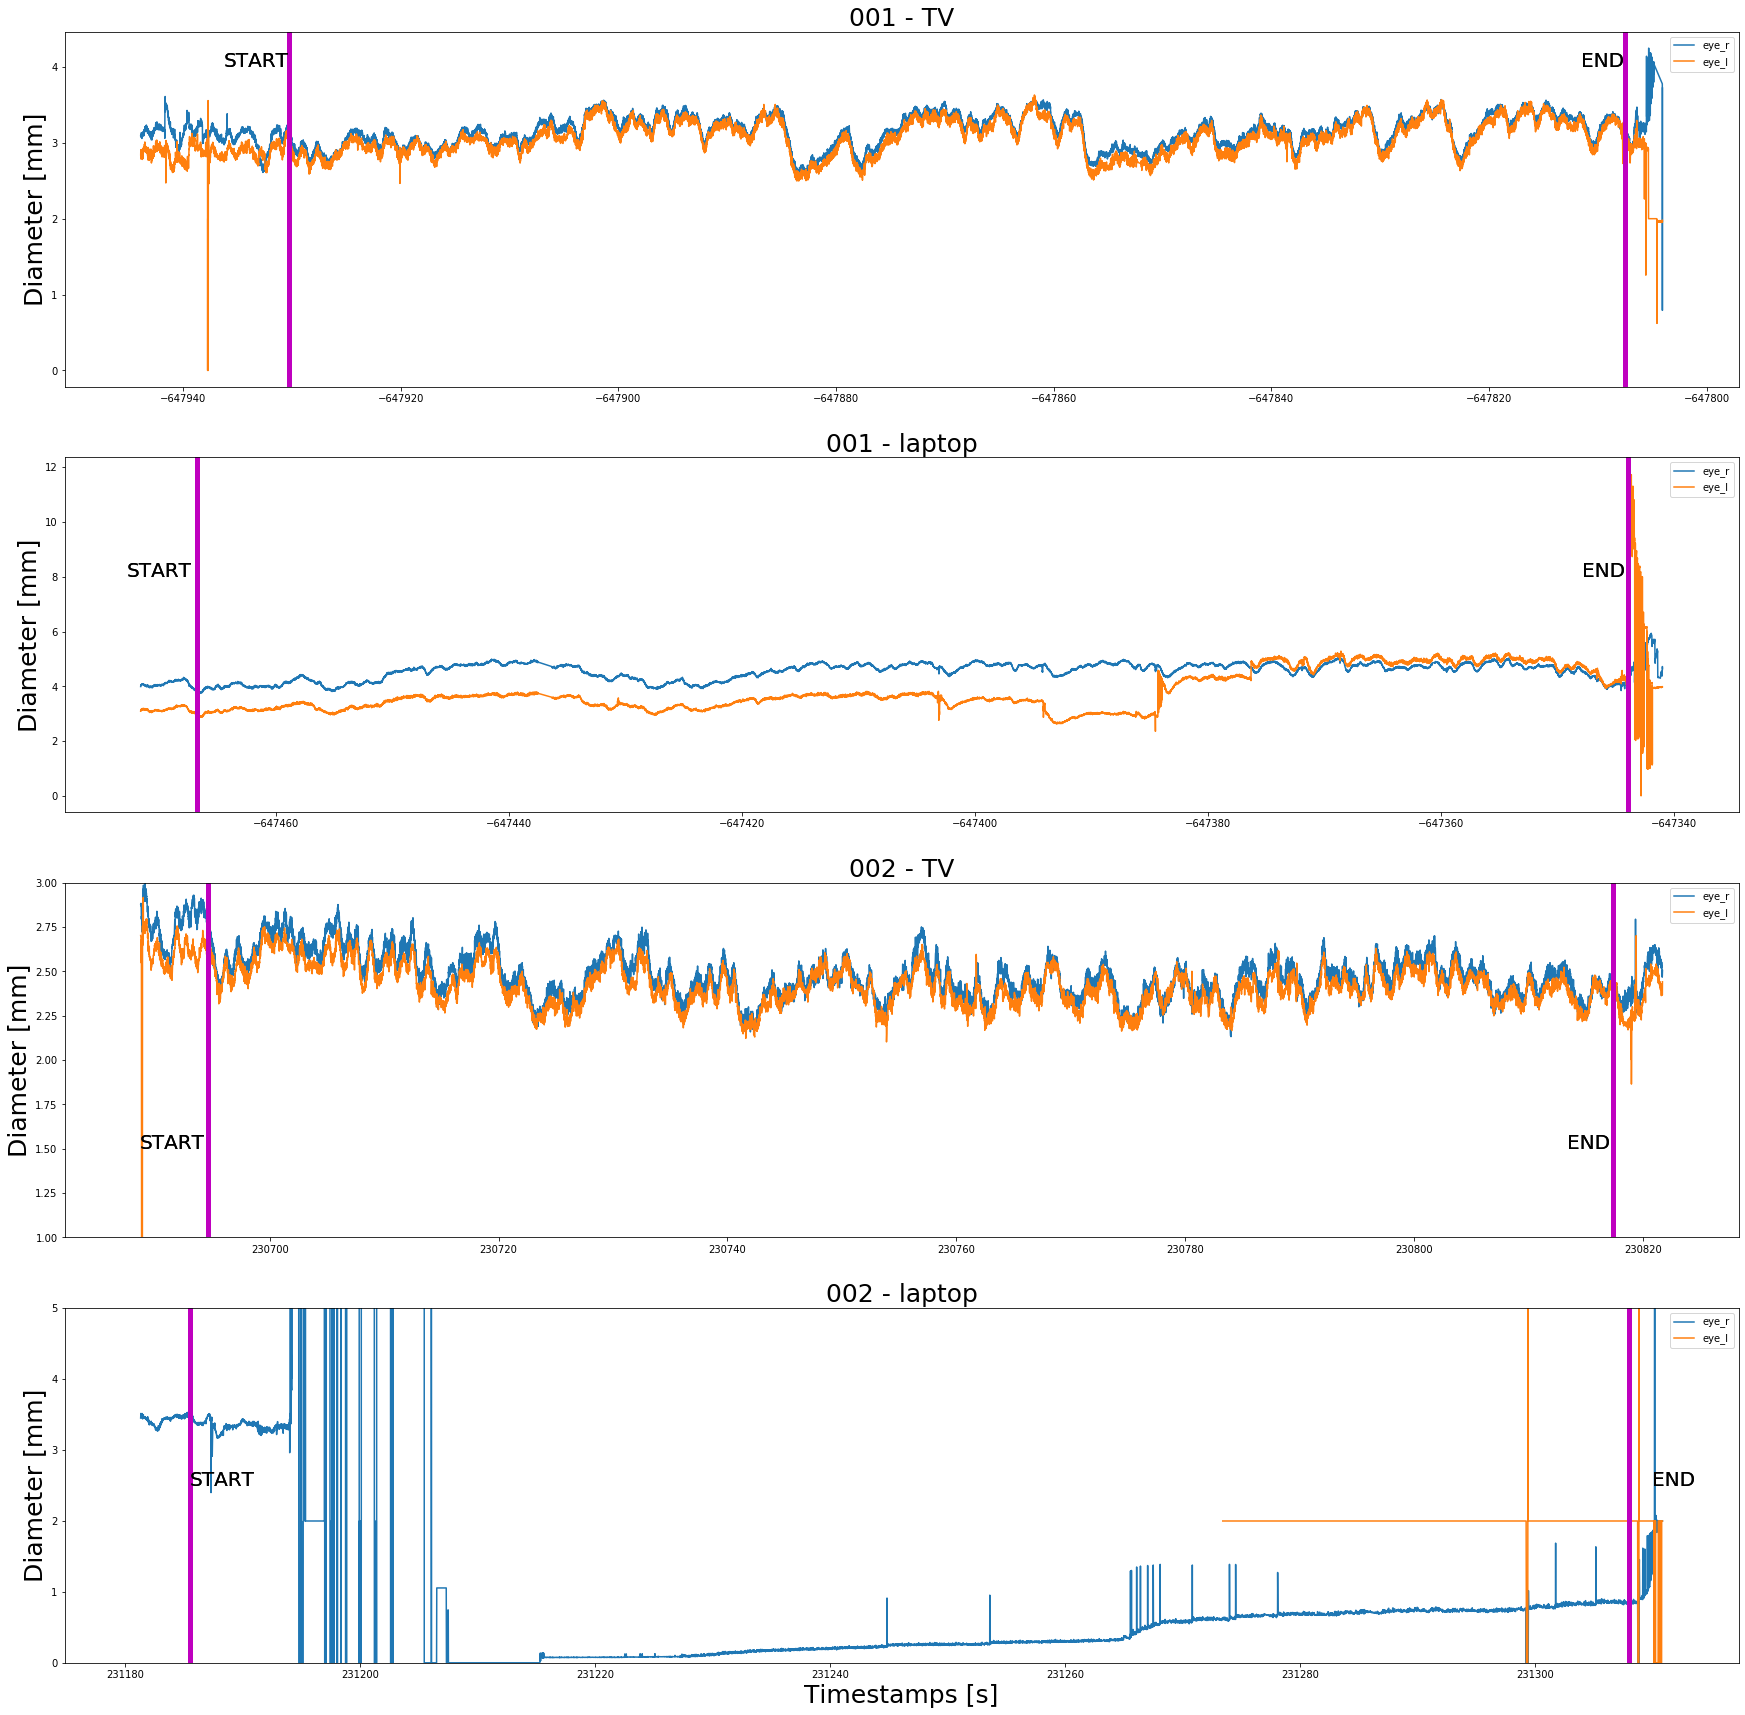

In [16]:
#pre-defined settings
fig = plt.figure(figsize=(30,30))
size_axes = 25;
size_title = 25;

########################################### Plot figure 1 ############################################################
ax = fig.add_subplot(411)
plt.plot(df_001_tv_eye_r['timestamp'], df_001_tv_eye_r['diameter_3d'])
plt.plot(df_001_tv_eye_l['timestamp'], df_001_tv_eye_l['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('001 - TV', size = size_title)
#plt.ylim(15,35) #adjusted the ylim manually due to default very wide zoom

for xc,c in zip(xcoords_001_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_tv-6,4,'START', fontsize = 20)
    plt.text(timestamp_end_001_tv-4,4,'END', fontsize = 20)

########################################### Plot figure 2 ############################################################
ax = fig.add_subplot(412)
plt.plot(df_001_laptop_eye_r['timestamp'], df_001_laptop_eye_r['diameter_3d'])
plt.plot(df_001_laptop_eye_l['timestamp'], df_001_laptop_eye_l['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('001 - laptop', size = size_title)
#plt.ylim(30,45) #NOTE THIS DIFFERENCE IN AXES VALUES COMPARED TO FIG 1 AND FIG 3

for xc,c in zip(xcoords_001_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_laptop-6,8,'START', fontsize = 20)
    plt.text(timestamp_end_001_laptop-4,8,'END', fontsize = 20)

############################################ Plot figure 3 ############################################################
ax = fig.add_subplot(413)
plt.plot(df_002_tv_eye_r['timestamp'], df_002_tv_eye_r['diameter_3d'])
plt.plot(df_002_tv_eye_l['timestamp'], df_002_tv_eye_l['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('002 - TV', size = size_title)
plt.ylim(1,3) #adjusted the ylim manually due to default very wide zoom

for xc,c in zip(xcoords_002_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_tv-6,1.5,'START', fontsize = 20)
    plt.text(timestamp_end_002_tv-4,1.5,'END', fontsize = 20)

########################################### Plot figure 4 ############################################################
ax = fig.add_subplot(414)
plt.plot(df_002_laptop_eye_r['timestamp'], df_002_laptop_eye_r['diameter_3d'])
plt.plot(df_002_laptop_eye_l['timestamp'], df_002_laptop_eye_l['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.xlabel('Timestamps [s]', size = size_axes)
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('002 - laptop', size = size_title)
plt.ylim(0,5) #NOTE THE DIFFERENCE AND VARIANCE IN VALUES COMPARED TO FIG 1, 2 AND 3.

for xc,c in zip(xcoords_002_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_laptop,2.5,'START', fontsize = 20)
    plt.text(timestamp_end_002_laptop+2,2.5,'END', fontsize = 20)

In [17]:
## define the new variables with a higher confidence interval
## A confidence interval of < 60 % is viewed as outliers (Niehorster et al., 2020).

#Reference: 
#Niehorster, D. C., Santini, T., Hessels, R. S., Hooge, I. T., Kasneci, E., & Nyström, M. (2020). 
#The impact of slippage on the data quality of head-worn eye trackers. Behavior Research Methods, 1-21.

# 001 TV
df_001_tv_eye_r_high_conf = df_001_tv_eye_r[df_001_tv_eye_r['confidence'] > .60]
df_001_tv_eye_l_high_conf = df_001_tv_eye_l[df_001_tv_eye_l['confidence'] > .60]

# 001 laptop
df_001_laptop_eye_r_high_conf = df_001_laptop_eye_r[df_001_laptop_eye_r['confidence'] > .60]
df_001_laptop_eye_l_high_conf = df_001_laptop_eye_l[df_001_laptop_eye_l['confidence'] > .60]

# 002 TV
df_002_tv_eye_r_high_conf = df_002_tv_eye_r[df_002_tv_eye_r['confidence'] > .60]
df_002_tv_eye_l_high_conf = df_002_tv_eye_l[df_002_tv_eye_l['confidence'] > .60]

# 002 laptop
df_002_laptop_eye_r_high_conf = df_002_laptop_eye_r[df_002_laptop_eye_r['confidence'] > .60]
df_002_laptop_eye_l_high_conf = df_002_laptop_eye_l[df_002_laptop_eye_l['confidence'] > .60]

pixel (2D) data


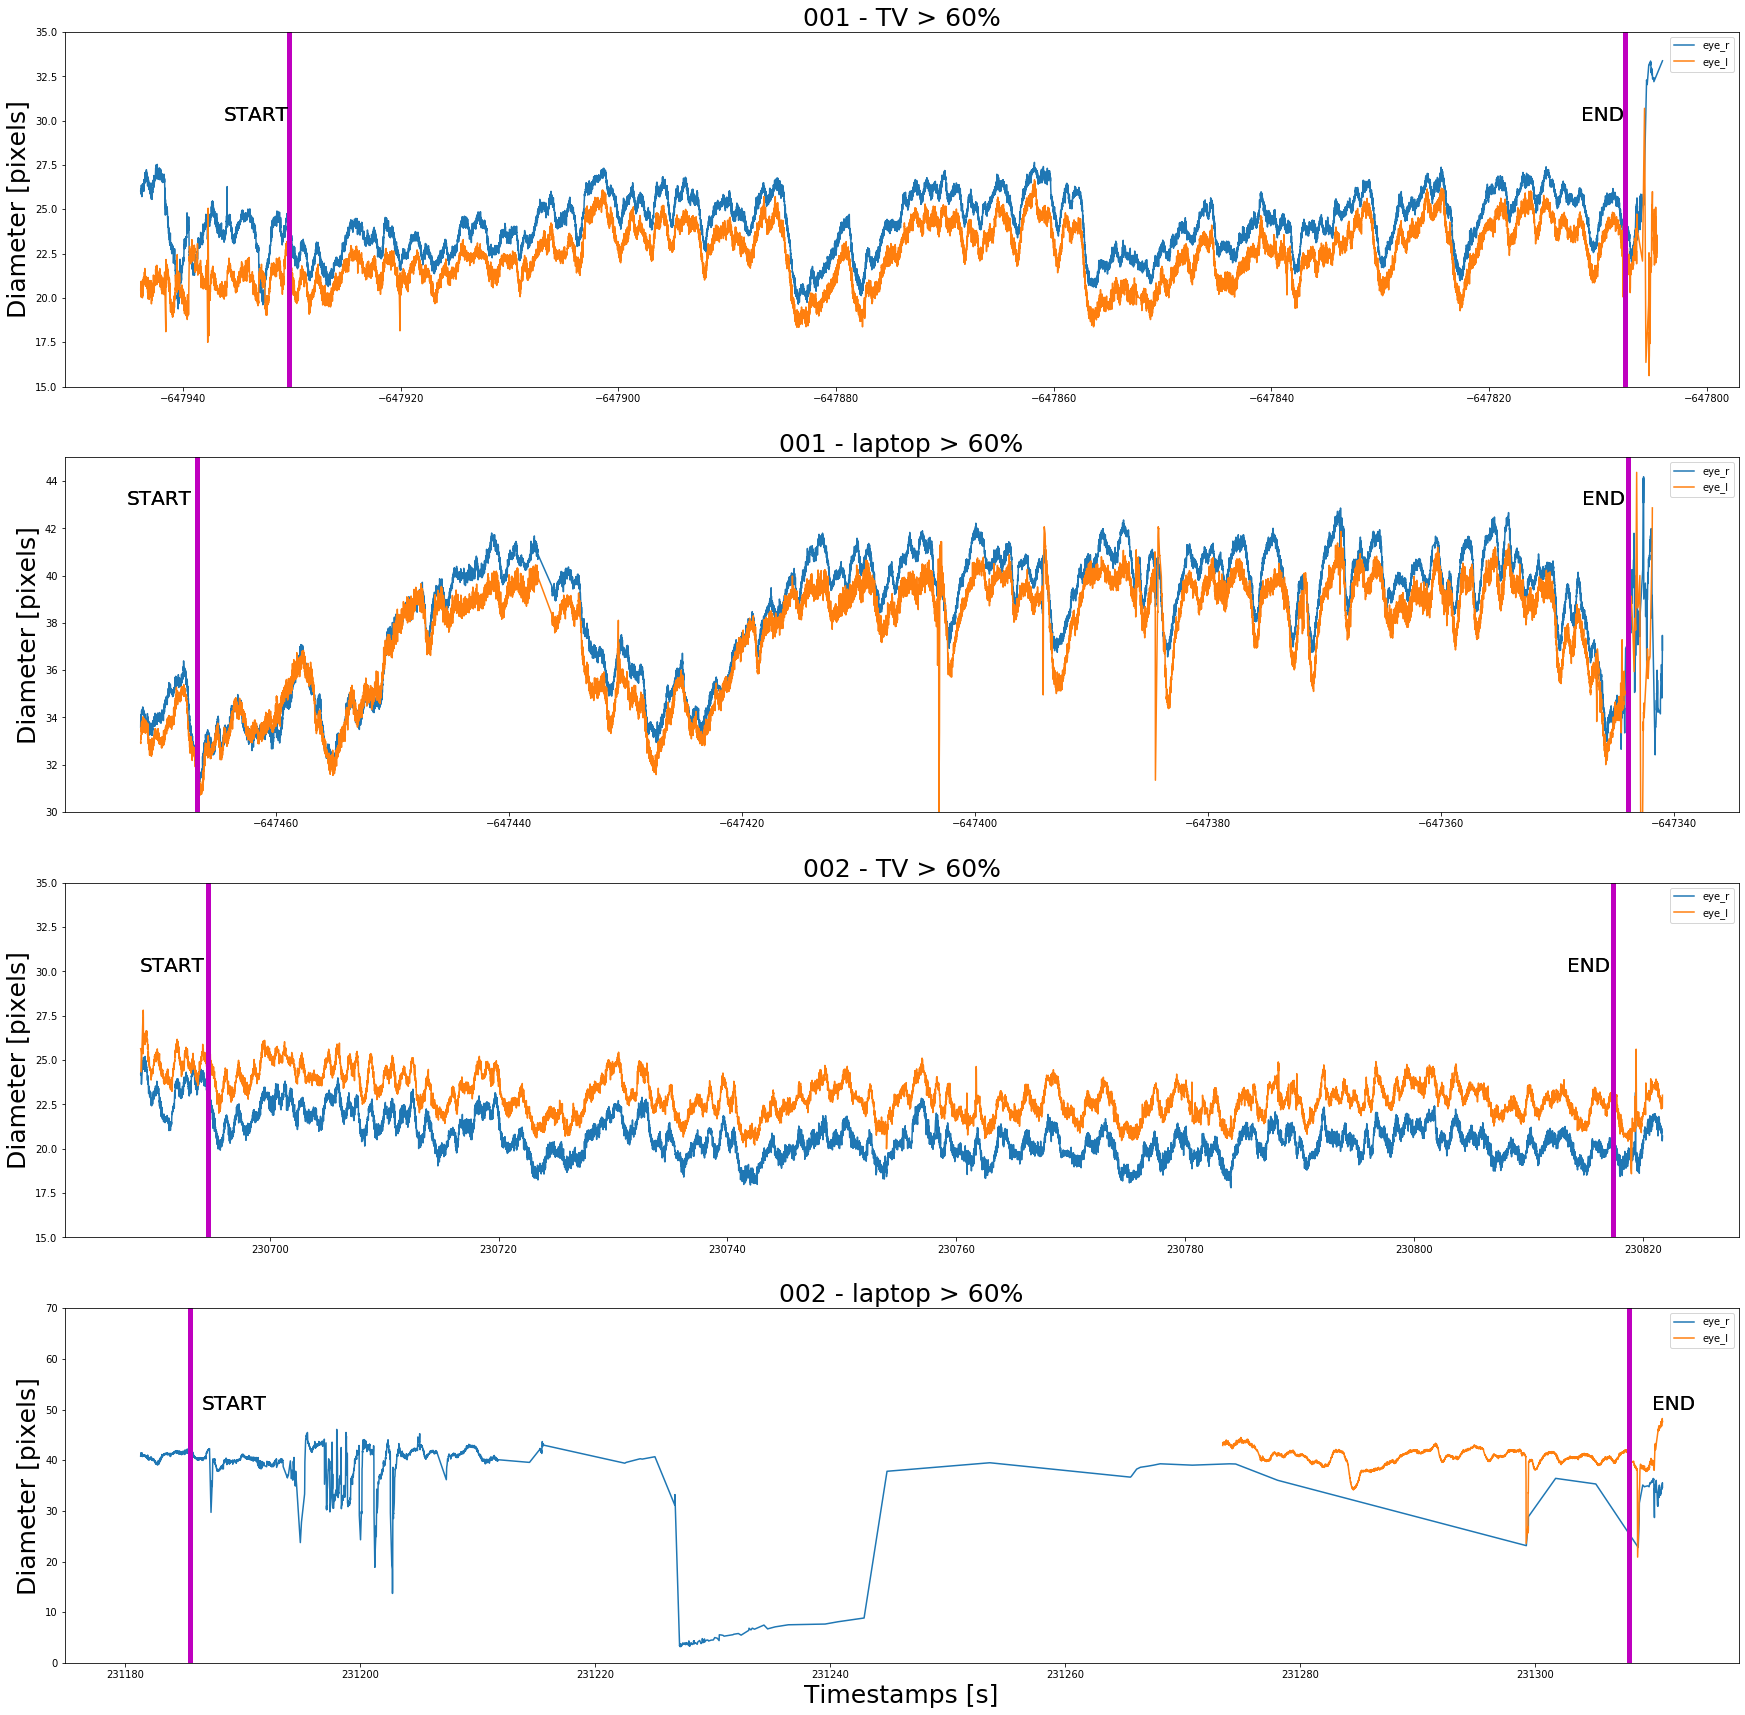

In [18]:
#pre-defined settings
fig = plt.figure(figsize=(30,30))
size_axes = 25;
size_title = 25;

########################################### Plot figure 1 ############################################################
ax = fig.add_subplot(411)
plt.plot(df_001_tv_eye_r_high_conf['timestamp'], df_001_tv_eye_r_high_conf['diameter'])
plt.plot(df_001_tv_eye_l_high_conf['timestamp'], df_001_tv_eye_l_high_conf['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('001 - TV > 60%', size = size_title)
plt.ylim(15,35) #adjusted the ylim manually due to default very wide zoom

for xc,c in zip(xcoords_001_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_tv-6,30,'START', fontsize = 20)
    plt.text(timestamp_end_001_tv-4,30,'END', fontsize = 20)

########################################### Plot figure 2 ############################################################
ax = fig.add_subplot(412)
plt.plot(df_001_laptop_eye_r_high_conf['timestamp'], df_001_laptop_eye_r_high_conf['diameter'])
plt.plot(df_001_laptop_eye_l_high_conf['timestamp'], df_001_laptop_eye_l_high_conf['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('001 - laptop > 60%', size = size_title)
plt.ylim(30,45) #NOTE THIS DIFFERENCE IN AXES VALUES COMPARED TO FIG 1 AND FIG 3

for xc,c in zip(xcoords_001_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_laptop-6,43,'START', fontsize = 20)
    plt.text(timestamp_end_001_laptop-4,43,'END', fontsize = 20)


############################################ Plot figure 3 ############################################################
ax = fig.add_subplot(413)
plt.plot(df_002_tv_eye_r_high_conf['timestamp'], df_002_tv_eye_r_high_conf['diameter'])
plt.plot(df_002_tv_eye_l_high_conf['timestamp'], df_002_tv_eye_l_high_conf['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('002 - TV > 60%', size = size_title)
plt.ylim(15,35) #adjusted the ylim manually due to default very wide zoom

for xc,c in zip(xcoords_002_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_tv-6,30,'START', fontsize = 20)
    plt.text(timestamp_end_002_tv-4,30,'END', fontsize = 20)
    
########################################### Plot figure 4 ############################################################
ax = fig.add_subplot(414)
plt.plot(df_002_laptop_eye_r_high_conf['timestamp'], df_002_laptop_eye_r_high_conf['diameter'])
plt.plot(df_002_laptop_eye_l_high_conf['timestamp'], df_002_laptop_eye_l_high_conf['diameter'])
plt.legend(['eye_r', 'eye_l'])
plt.xlabel('Timestamps [s]', size = size_axes)
plt.ylabel('Diameter [pixels]', size = size_axes)
plt.title('002 - laptop > 60%', size = size_title)
plt.ylim(0,70) #NOTE THE DIFFERENCE AND VARIANCE IN VALUES COMPARED TO FIG 1, 2 AND 3.

for xc,c in zip(xcoords_002_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_laptop+1,50,'START', fontsize = 20)
    plt.text(timestamp_end_002_laptop+2,50,'END', fontsize = 20)
    
print('pixel (2D) data')

mm (3D) data


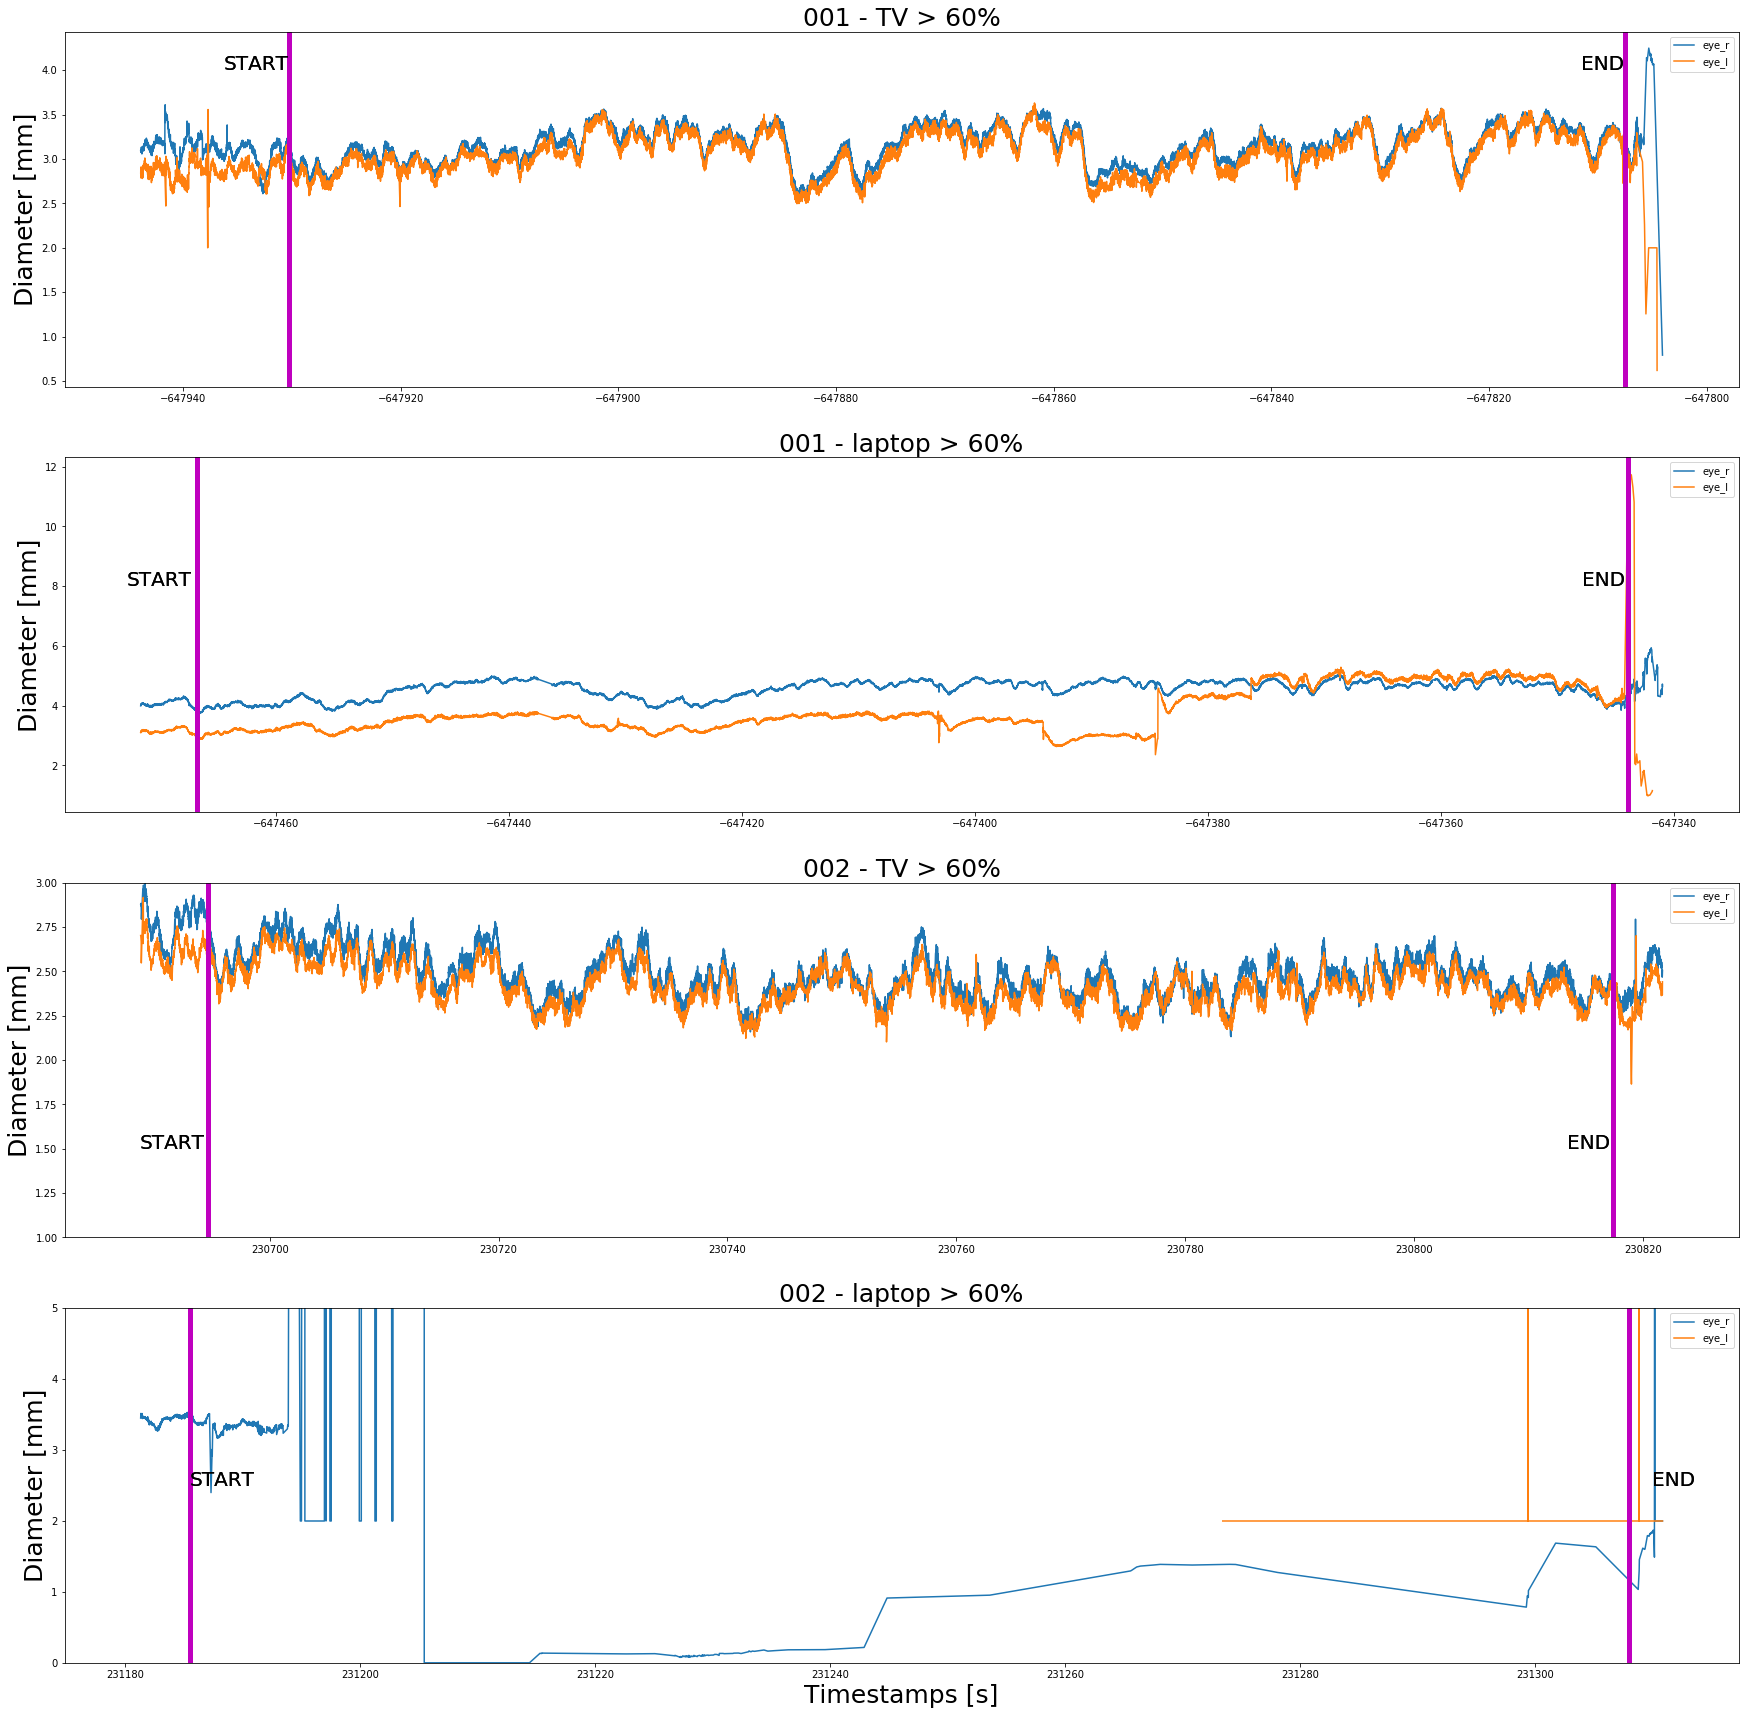

In [19]:
#pre-defined settings
fig = plt.figure(figsize=(30,30))
size_axes = 25;
size_title = 25;

########################################### Plot figure 1 ############################################################
ax = fig.add_subplot(411)
plt.plot(df_001_tv_eye_r_high_conf['timestamp'], df_001_tv_eye_r_high_conf['diameter_3d'])
plt.plot(df_001_tv_eye_l_high_conf['timestamp'], df_001_tv_eye_l_high_conf['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('001 - TV > 60%', size = size_title)
#plt.ylim(15,35) #adjusted the ylim manually due to default very wide zoom

for xc,c in zip(xcoords_001_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_tv-6,4,'START', fontsize = 20)
    plt.text(timestamp_end_001_tv-4,4,'END', fontsize = 20)

########################################### Plot figure 2 ############################################################
ax = fig.add_subplot(412)
plt.plot(df_001_laptop_eye_r_high_conf['timestamp'], df_001_laptop_eye_r_high_conf['diameter_3d'])
plt.plot(df_001_laptop_eye_l_high_conf['timestamp'], df_001_laptop_eye_l_high_conf['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('001 - laptop > 60%', size = size_title)
#plt.ylim(30,45) #NOTE THIS DIFFERENCE IN AXES VALUES COMPARED TO FIG 1 AND FIG 3

for xc,c in zip(xcoords_001_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_001_laptop-6,8,'START', fontsize = 20)
    plt.text(timestamp_end_001_laptop-4,8,'END', fontsize = 20)


############################################ Plot figure 3 ############################################################
ax = fig.add_subplot(413)
plt.plot(df_002_tv_eye_r_high_conf['timestamp'], df_002_tv_eye_r_high_conf['diameter_3d'])
plt.plot(df_002_tv_eye_l_high_conf['timestamp'], df_002_tv_eye_l_high_conf['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('002 - TV > 60%', size = size_title)
plt.ylim(1,3) #adjusted the ylim manually due to default very wide zoom

for xc,c in zip(xcoords_002_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_tv-6,1.5,'START', fontsize = 20)
    plt.text(timestamp_end_002_tv-4,1.5,'END', fontsize = 20)
    
########################################### Plot figure 4 ############################################################
ax = fig.add_subplot(414)
plt.plot(df_002_laptop_eye_r_high_conf['timestamp'], df_002_laptop_eye_r_high_conf['diameter_3d'])
plt.plot(df_002_laptop_eye_l_high_conf['timestamp'], df_002_laptop_eye_l_high_conf['diameter_3d'])
plt.legend(['eye_r', 'eye_l'])
plt.xlabel('Timestamps [s]', size = size_axes)
plt.ylabel('Diameter [mm]', size = size_axes)
plt.title('002 - laptop > 60%', size = size_title)
plt.ylim(0,5) #NOTE THE DIFFERENCE AND VARIANCE IN VALUES COMPARED TO FIG 1, 2 AND 3.

for xc,c in zip(xcoords_002_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=5)
    plt.text(timestamp_start_002_laptop,2.5,'START', fontsize = 20)
    plt.text(timestamp_end_002_laptop+2,2.5,'END', fontsize = 20)
    
print('mm (3D) data')

# Plot Pupil Positions
#### Pupil Positions Over Time
Next, we will visualize the pupil positions in the eye image over time. Low confidence (<60%) points will not be visualized.

001 - TV


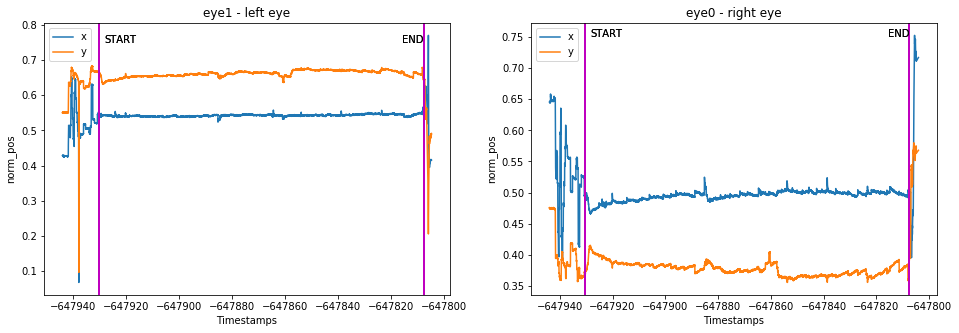

In [20]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.plot(df_001_tv_eye_l_high_conf['timestamp'], df_001_tv_eye_l_high_conf['norm_pos_x'])
plt.plot(df_001_tv_eye_l_high_conf['timestamp'], df_001_tv_eye_l_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye1 - left eye')
plt.legend("xy")

for xc,c in zip(xcoords_001_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_001_tv+2,.75,'START', fontsize = 10)
    plt.text(timestamp_end_001_tv-8,.75,'END', fontsize = 10)


# plot right eye
plt.subplot(1, 2, 2)
plt.plot(df_001_tv_eye_r_high_conf['timestamp'], df_001_tv_eye_r_high_conf['norm_pos_x'])
plt.plot(df_001_tv_eye_r_high_conf['timestamp'], df_001_tv_eye_r_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye0 - right eye')
plt.legend("xy")

for xc,c in zip(xcoords_001_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_001_tv+2,.75,'START', fontsize = 10)
    plt.text(timestamp_end_001_tv-8,.75,'END', fontsize = 10)

print("001 - TV")

001 - laptop


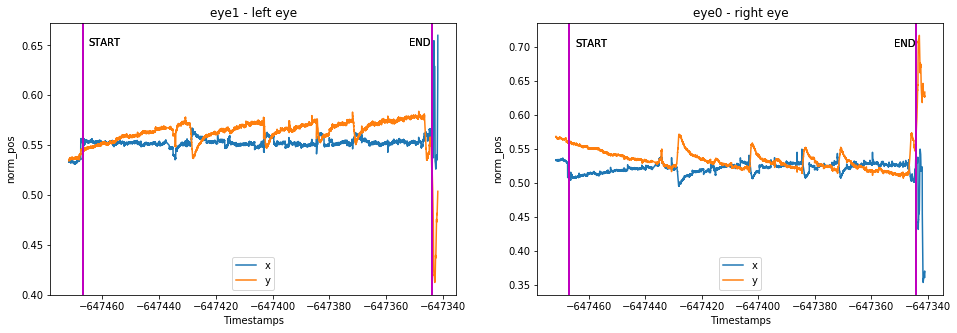

In [21]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.plot(df_001_laptop_eye_l_high_conf['timestamp'], df_001_laptop_eye_l_high_conf['norm_pos_x'])
plt.plot(df_001_laptop_eye_l_high_conf['timestamp'], df_001_laptop_eye_l_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye1 - left eye')
plt.legend("xy")

for xc,c in zip(xcoords_001_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_001_laptop+2,.65,'START', fontsize = 10)
    plt.text(timestamp_end_001_laptop-8,.65,'END', fontsize = 10)


# plot right eye
plt.subplot(1, 2, 2)
plt.plot(df_001_laptop_eye_r_high_conf['timestamp'], df_001_laptop_eye_r_high_conf['norm_pos_x'])
plt.plot(df_001_laptop_eye_r_high_conf['timestamp'], df_001_laptop_eye_r_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye0 - right eye')
plt.legend("xy")

for xc,c in zip(xcoords_001_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_001_laptop+2,.70,'START', fontsize = 10)
    plt.text(timestamp_end_001_laptop-8,.70,'END', fontsize = 10)
    
    
print("001 - laptop")

002 - TV


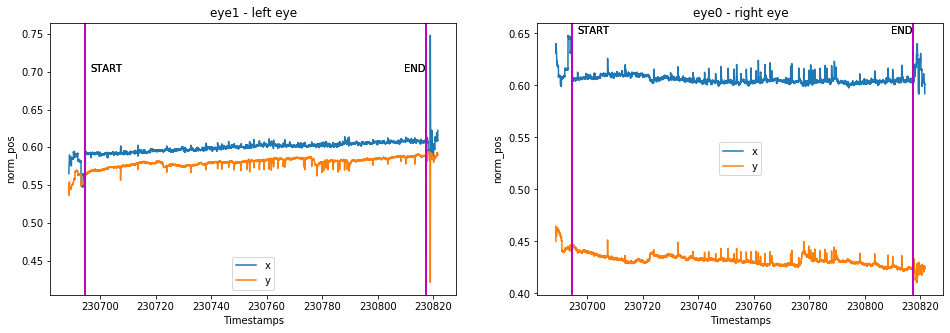

In [22]:
plt.figure(figsize=(16, 5))

# 002
# plot left eye
plt.subplot(1, 2, 1)
plt.plot(df_002_tv_eye_l_high_conf['timestamp'], df_002_tv_eye_l_high_conf['norm_pos_x'])
plt.plot(df_002_tv_eye_l_high_conf['timestamp'], df_002_tv_eye_l_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye1 - left eye')
plt.legend("xy")

for xc,c in zip(xcoords_002_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_002_tv+2,.70,'START', fontsize = 10)
    plt.text(timestamp_end_002_tv-8,.70,'END', fontsize = 10)

# plot right eye
plt.subplot(1, 2, 2)
plt.plot(df_002_tv_eye_r_high_conf['timestamp'], df_002_tv_eye_r_high_conf['norm_pos_x'])
plt.plot(df_002_tv_eye_r_high_conf['timestamp'], df_002_tv_eye_r_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye0 - right eye')
plt.legend("xy")

for xc,c in zip(xcoords_002_tv,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_002_tv+2,.65,'START', fontsize = 10)
    plt.text(timestamp_end_002_tv-8,.65,'END', fontsize = 10)
    
print("002 - TV")

002 - laptop


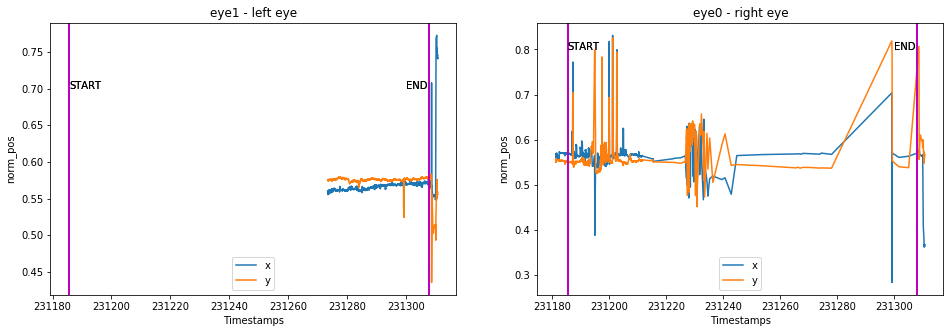

In [190]:
plt.figure(figsize=(16, 5))

# 002
# plot left eye
plt.subplot(1, 2, 1)
plt.plot(df_002_laptop_eye_l_high_conf['timestamp'], df_002_laptop_eye_l_high_conf['norm_pos_x'])
plt.plot(df_002_laptop_eye_l_high_conf['timestamp'], df_002_laptop_eye_l_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye1 - left eye')
plt.legend("xy")

for xc,c in zip(xcoords_002_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_002_laptop,.70,'START', fontsize = 10)
    plt.text(timestamp_end_002_laptop-8,.70,'END', fontsize = 10)

# plot right eye
plt.subplot(1, 2, 2)
plt.plot(df_002_laptop_eye_r_high_conf['timestamp'], df_002_laptop_eye_r_high_conf['norm_pos_x'])
plt.plot(df_002_laptop_eye_r_high_conf['timestamp'], df_002_laptop_eye_r_high_conf['norm_pos_y'])
plt.xlabel('Timestamps')
plt.ylabel('norm_pos')
#plt.ylim([0, 1])
plt.title('eye0 - right eye')
plt.legend("xy")

for xc,c in zip(xcoords_002_laptop,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linewidth=2)
    plt.text(timestamp_start_002_laptop,.8,'START', fontsize = 10)
    plt.text(timestamp_end_002_laptop-8,.8,'END', fontsize = 10)

print("002 - laptop")

### Spatial Distribution
Alternatively, we will visualize the spatial distribution of pupil positions in the eye image in form of a scatter plot. Again we discard low confidence points. We will color code each point with it's timestamp, this way we can roughly see the trajectory each pupil had during the recording. Note that the following 8 plots also include the periods before and after the fixation cross. Somewhat further in this notebook, I plot only the spatial distributions during 2 min of the fixation cross. Last note, I think that identifying the spatial distribution during the fixation cross is also an additional quality control, since this confirms/not confirms that the participant was fixating their gaze.

001 TV


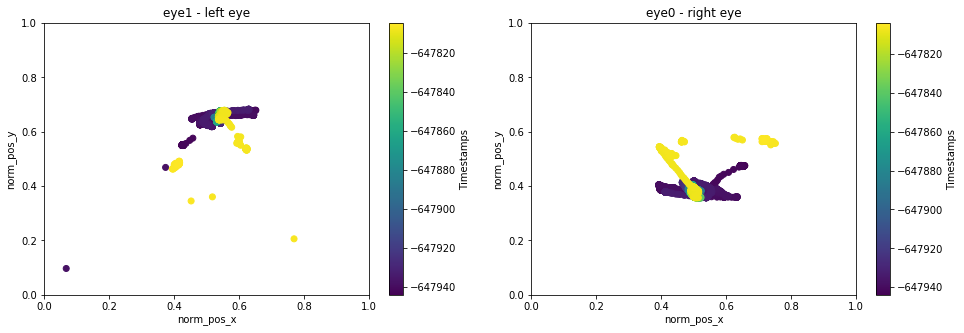

In [23]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_001_tv_eye_l_high_conf['norm_pos_x'], df_001_tv_eye_l_high_conf['norm_pos_y'], c=df_001_tv_eye_l_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_001_tv_eye_r_high_conf['norm_pos_x'], df_001_tv_eye_r_high_conf['norm_pos_y'], c=df_001_tv_eye_r_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("001 TV")


001 laptop


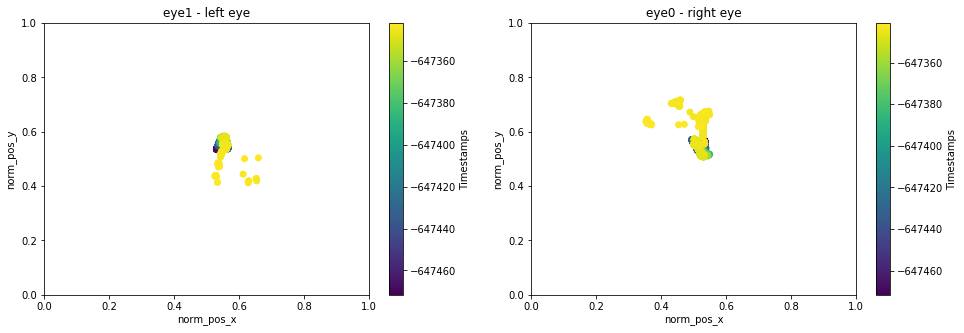

In [24]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_001_laptop_eye_l_high_conf['norm_pos_x'], df_001_laptop_eye_l_high_conf['norm_pos_y'], c=df_001_laptop_eye_l_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_001_laptop_eye_r_high_conf['norm_pos_x'], df_001_laptop_eye_r_high_conf['norm_pos_y'], c=df_001_laptop_eye_r_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("001 laptop")

002 TV


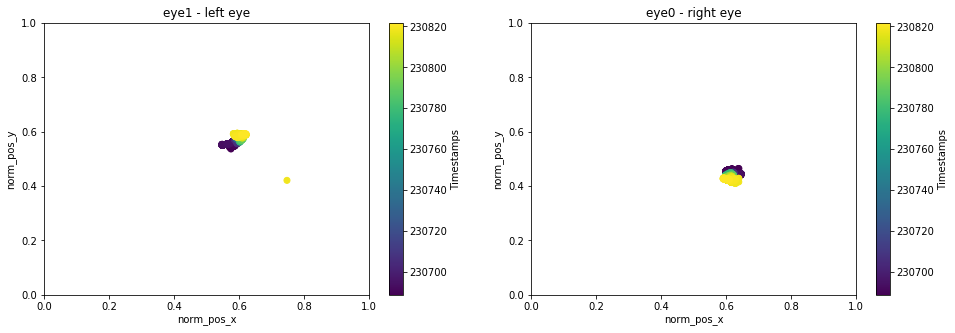

In [25]:
plt.figure(figsize=(16, 5))


# 002
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_002_tv_eye_l_high_conf['norm_pos_x'], df_002_tv_eye_l_high_conf['norm_pos_y'], c=df_002_tv_eye_l_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_002_tv_eye_r_high_conf['norm_pos_x'], df_002_tv_eye_r_high_conf['norm_pos_y'], c=df_002_tv_eye_r_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("002 TV")

002 laptop


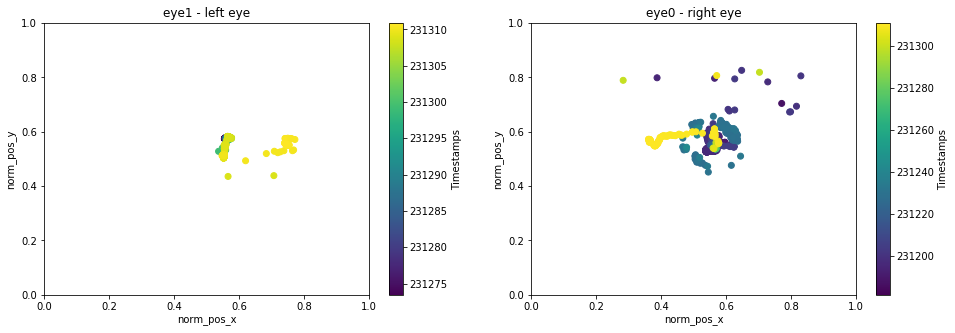

In [26]:
plt.figure(figsize=(16, 5))

# 002
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_002_laptop_eye_l_high_conf['norm_pos_x'], df_002_laptop_eye_l_high_conf['norm_pos_y'], c=df_002_laptop_eye_l_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_002_laptop_eye_r_high_conf['norm_pos_x'], df_002_laptop_eye_r_high_conf['norm_pos_y'], c=df_002_laptop_eye_r_high_conf['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("002 laptop")

## Now we plot the spatial distribution as a function of time for only the fixation cross (2 min exactly), so without the periods before and after the fixation cross.

In [64]:
#Define the start and end
start_001_tv = timestamp_start_001_tv 
end_001_tv = timestamp_end_001_tv

start_001_laptop = timestamp_start_001_laptop
end_001_laptop = timestamp_end_001_laptop

start_002_tv = timestamp_start_002_tv
end_002_tv = timestamp_end_002_tv

start_002_laptop = timestamp_start_002_laptop
end_002_laptop = timestamp_end_002_laptop

#Create the new dataframes including only the timestamps of the fixation cross
## LEFT EYE ##
df_fixcross_001_tv = df_001_tv_eye_l_high_conf[(df_001_tv_eye_l_high_conf.timestamp >= start_001_tv) & (df_001_tv_eye_l_high_conf.timestamp <= end_001_tv)]
df_fixcross_001_laptop = df_001_laptop_eye_l_high_conf[(df_001_laptop_eye_l_high_conf.timestamp >= start_001_laptop) & (df_001_laptop_eye_l_high_conf.timestamp <= end_001_laptop)]
df_fixcross_002_tv = df_002_tv_eye_l_high_conf[(df_002_tv_eye_l_high_conf.timestamp >= start_002_tv) & (df_002_tv_eye_l_high_conf.timestamp <= end_002_tv)]
df_fixcross_002_laptop = df_002_laptop_eye_l_high_conf[(df_002_laptop_eye_l_high_conf.timestamp >= start_002_laptop) & (df_002_laptop_eye_l_high_conf.timestamp <= end_002_laptop)]

## RIGHT EYE ##
df_fixcross_001_tv_r = df_001_tv_eye_r_high_conf[(df_001_tv_eye_r_high_conf.timestamp >= start_001_tv) & (df_001_tv_eye_r_high_conf.timestamp <= end_001_tv)]
df_fixcross_001_laptop_r = df_001_laptop_eye_r_high_conf[(df_001_laptop_eye_r_high_conf.timestamp >= start_001_laptop) & (df_001_laptop_eye_r_high_conf.timestamp <= end_001_laptop)]
df_fixcross_002_tv_r = df_002_tv_eye_r_high_conf[(df_002_tv_eye_r_high_conf.timestamp >= start_002_tv) & (df_002_tv_eye_r_high_conf.timestamp <= end_002_tv)]
df_fixcross_002_laptop_r = df_002_laptop_eye_r_high_conf[(df_002_laptop_eye_r_high_conf.timestamp >= start_002_laptop) & (df_002_laptop_eye_r_high_conf.timestamp <= end_002_laptop)]

001 TV only fixcross


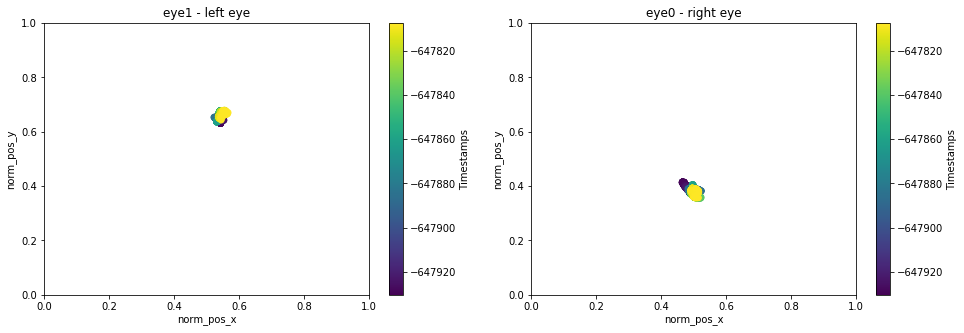

In [65]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_fixcross_001_tv['norm_pos_x'], df_fixcross_001_tv['norm_pos_y'], c=df_fixcross_001_tv['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_fixcross_001_tv_r['norm_pos_x'], df_fixcross_001_tv_r['norm_pos_y'], c=df_fixcross_001_tv_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("001 TV only fixcross")

001 laptop only fixcross


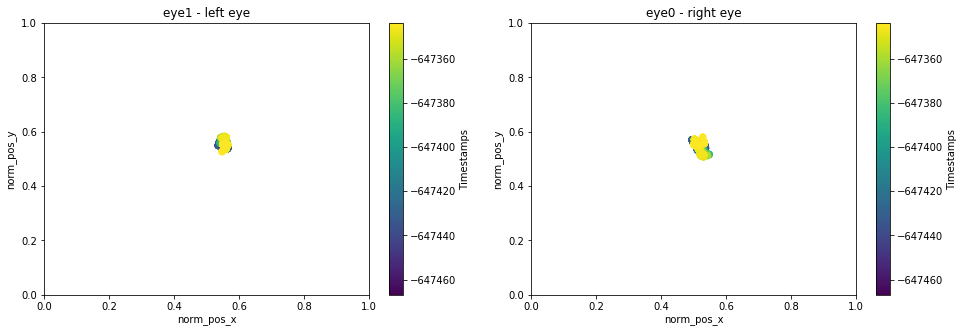

In [66]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_fixcross_001_laptop['norm_pos_x'], df_fixcross_001_laptop['norm_pos_y'], c=df_fixcross_001_laptop['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_fixcross_001_laptop_r['norm_pos_x'], df_fixcross_001_laptop_r['norm_pos_y'], c=df_fixcross_001_laptop_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("001 laptop only fixcross")

002 TV only fixcross


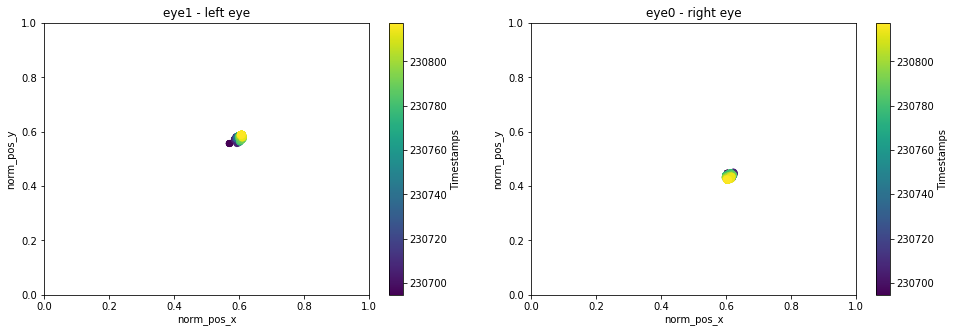

In [67]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_fixcross_002_tv['norm_pos_x'], df_fixcross_002_tv['norm_pos_y'], c=df_fixcross_002_tv['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_fixcross_002_tv_r['norm_pos_x'], df_fixcross_002_tv_r['norm_pos_y'], c=df_fixcross_002_tv_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("002 TV only fixcross")

002 laptop only fixcross


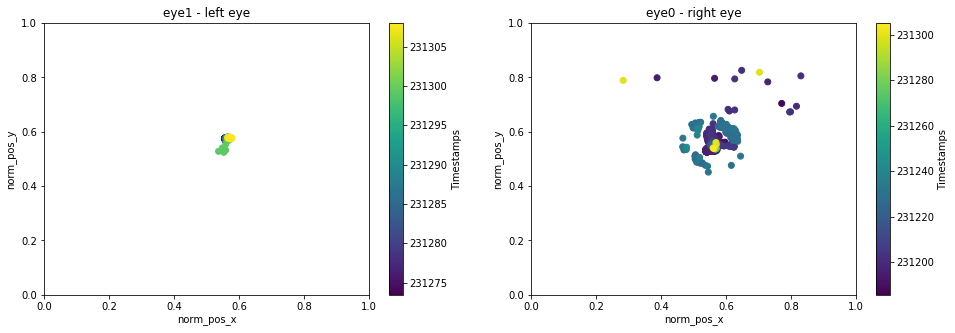

In [68]:
plt.figure(figsize=(16, 5))

# 001
# plot left eye
plt.subplot(1, 2, 1)
plt.scatter(df_fixcross_002_laptop['norm_pos_x'], df_fixcross_002_laptop['norm_pos_y'], c=df_fixcross_002_laptop['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye1 - left eye')

# plot right eye
plt.subplot(1, 2, 2)
plt.scatter(df_fixcross_002_laptop_r['norm_pos_x'], df_fixcross_002_laptop_r['norm_pos_y'], c=df_fixcross_002_laptop_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.xlabel('norm_pos_x')
plt.ylabel('norm_pos_y')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title('eye0 - right eye')

print("002 laptop only fixcross")

## Now we plot the same spatial distributions again, but now in a very detailed and 'zoomed-in' manner. Note the reduced x- and y- axes.

Text(0.5, 1.0, '002 laptop - right eye')

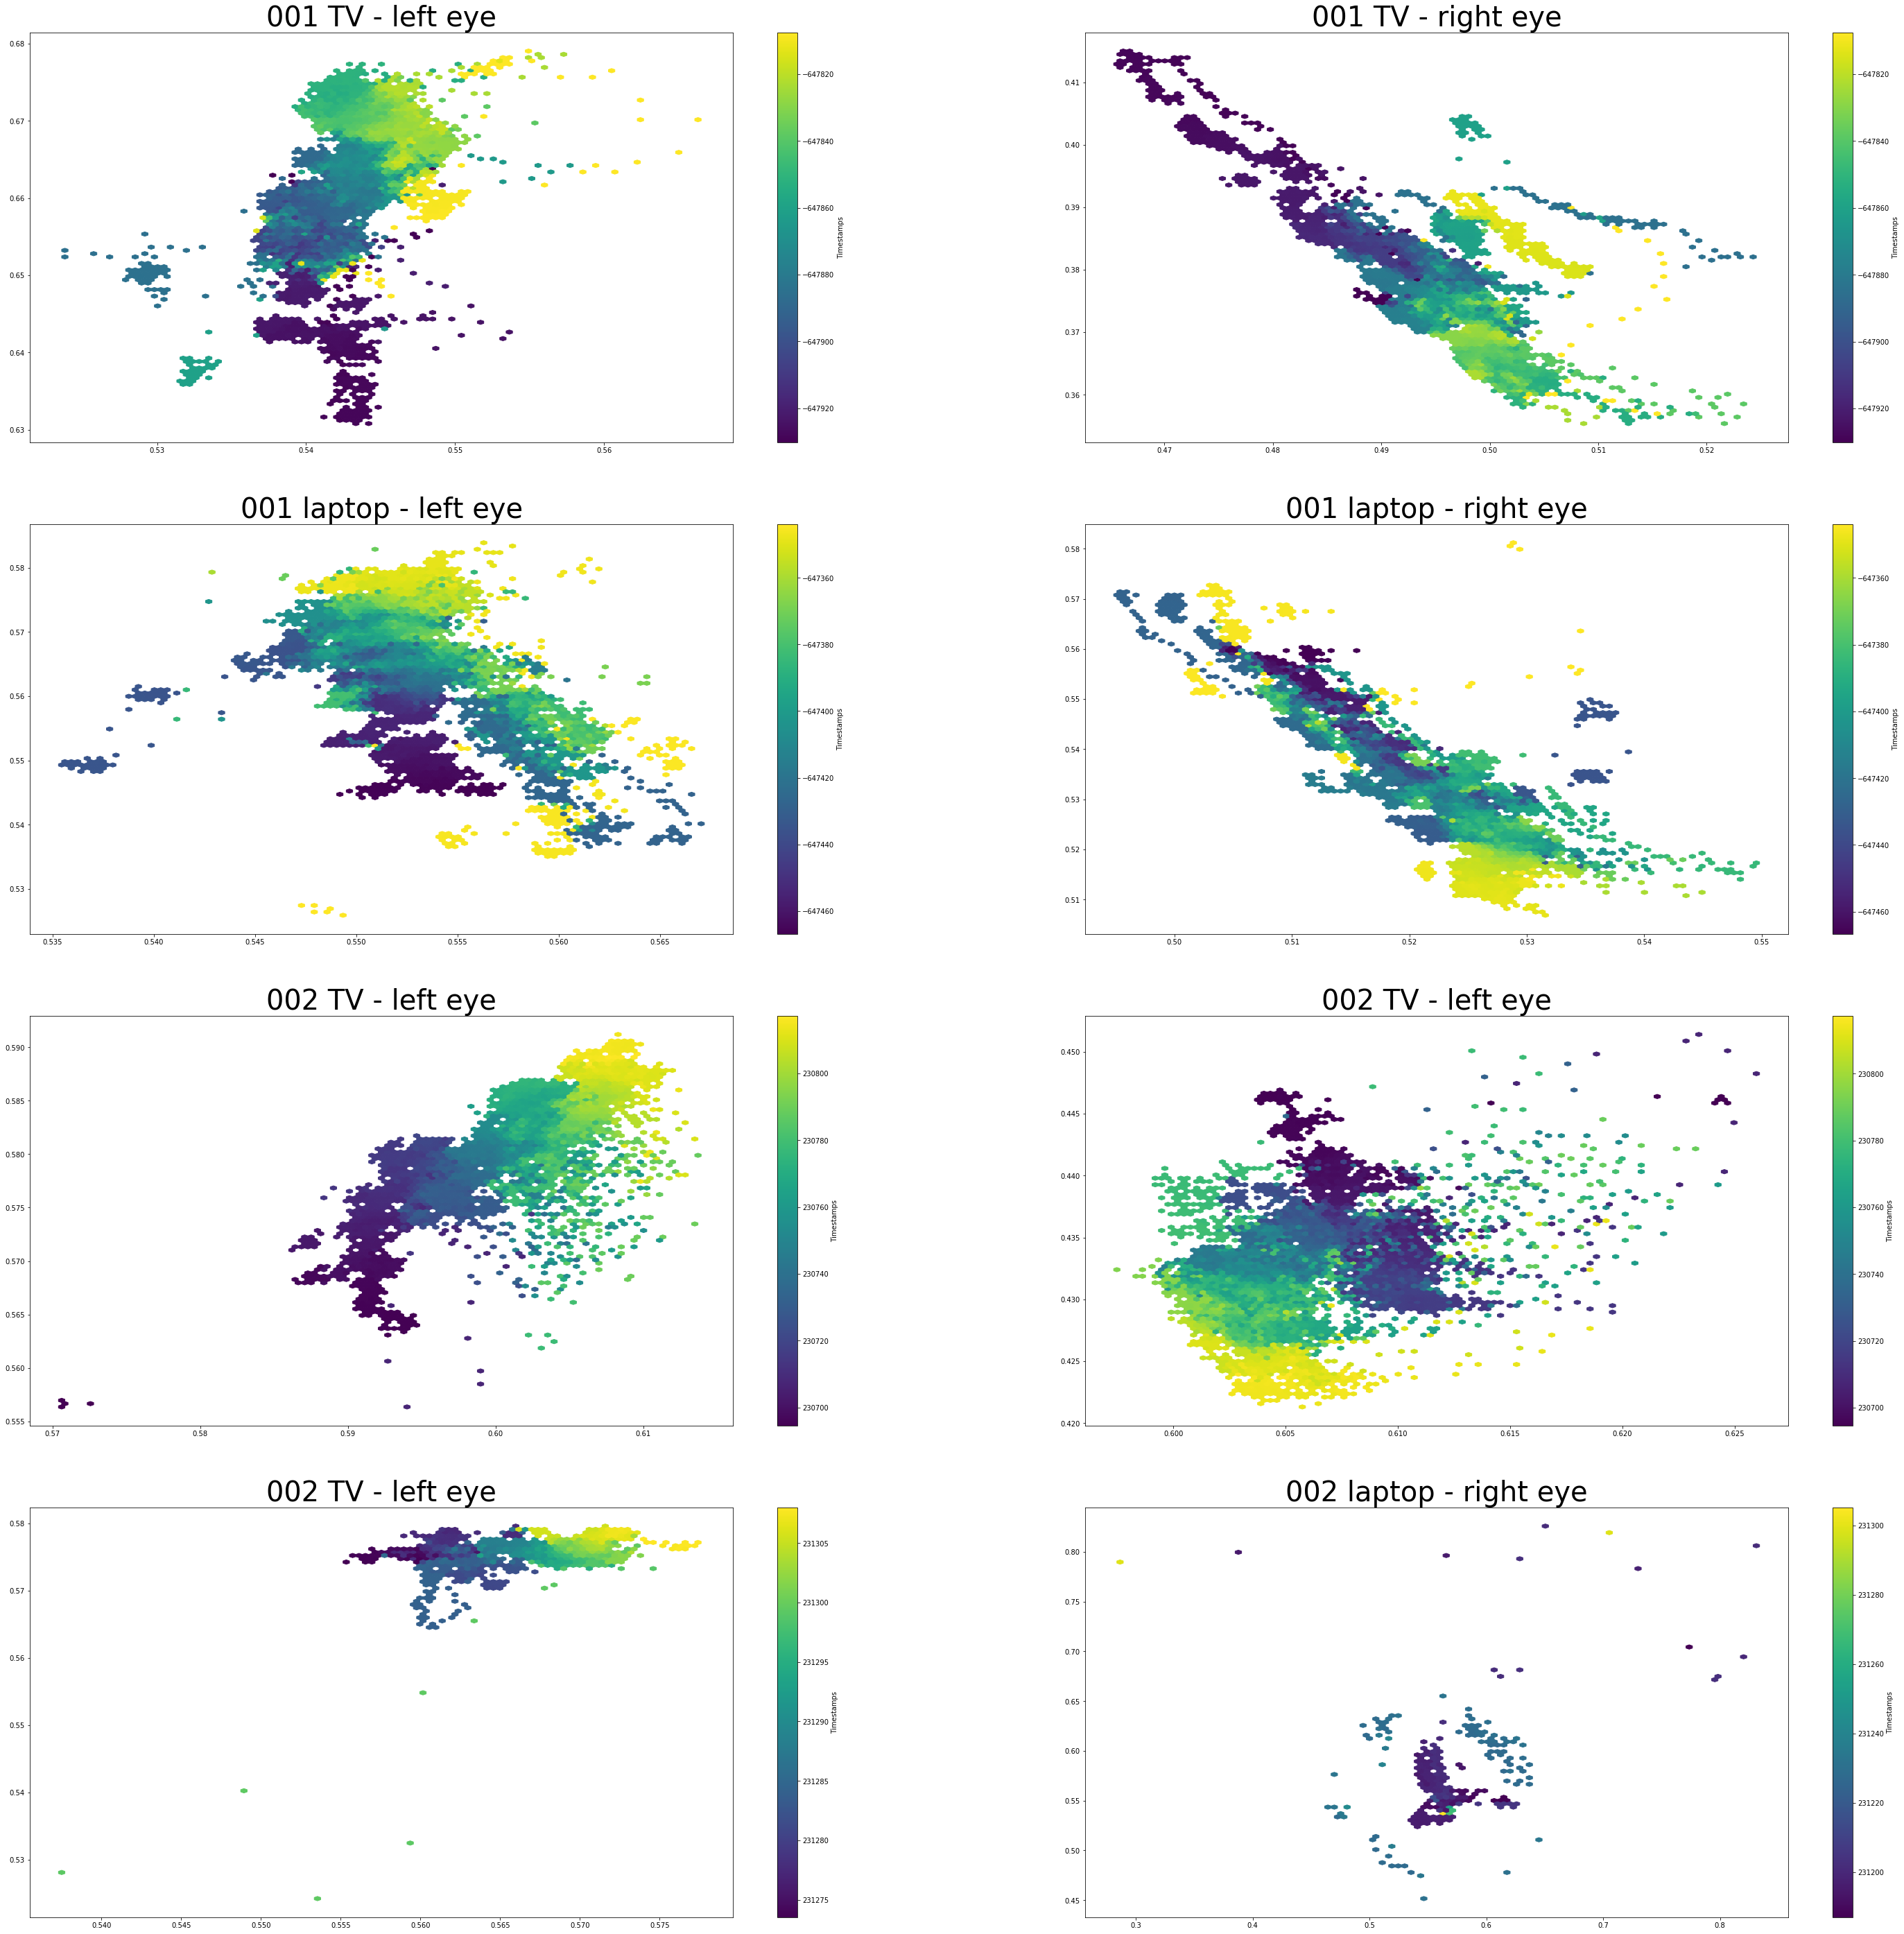

In [90]:
plt.figure(figsize=(50, 50))

#001 left eye TV
plt.subplot(4, 2, 1)
plt.hexbin(df_fixcross_001_tv['norm_pos_x'], df_fixcross_001_tv['norm_pos_y'],df_fixcross_001_tv['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("001 TV - left eye", size = 40)

#001 right eye TV
plt.subplot(4, 2, 2)
plt.hexbin(df_fixcross_001_tv_r['norm_pos_x'], df_fixcross_001_tv_r['norm_pos_y'],df_fixcross_001_tv_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("001 TV - right eye", size = 40)

#001 left eye laptop
plt.subplot(4, 2, 3)
plt.hexbin(df_fixcross_001_laptop['norm_pos_x'], df_fixcross_001_laptop['norm_pos_y'],df_fixcross_001_laptop['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("001 laptop - left eye", size = 40)

#001 right eye laptop
plt.subplot(4, 2, 4)
plt.hexbin(df_fixcross_001_laptop_r['norm_pos_x'], df_fixcross_001_laptop_r['norm_pos_y'],df_fixcross_001_laptop_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("001 laptop - right eye", size = 40)

#002 left eye TV
plt.subplot(4, 2, 5)
plt.hexbin(df_fixcross_002_tv['norm_pos_x'], df_fixcross_002_tv['norm_pos_y'],df_fixcross_002_tv['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("002 TV - left eye", size = 40)

#002 right eye TV
plt.subplot(4, 2, 6)
plt.hexbin(df_fixcross_002_tv_r['norm_pos_x'], df_fixcross_002_tv_r['norm_pos_y'],df_fixcross_002_tv_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("002 TV - left eye", size = 40)

#002 left eye laptop
plt.subplot(4, 2, 7)
plt.hexbin(df_fixcross_002_laptop['norm_pos_x'], df_fixcross_002_laptop['norm_pos_y'],df_fixcross_002_laptop['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("002 TV - left eye", size = 40)

#002 right eye laptop
plt.subplot(4, 2, 8)
plt.hexbin(df_fixcross_002_laptop_r['norm_pos_x'], df_fixcross_002_laptop_r['norm_pos_y'],df_fixcross_002_laptop_r['timestamp'])
plt.colorbar().ax.set_ylabel('Timestamps')
plt.title("002 laptop - right eye", size = 40)

# Lastly, we can make heatmaps of the spatial distribution of fixations

Text(0.5, 1.0, '002 laptop - right eye')

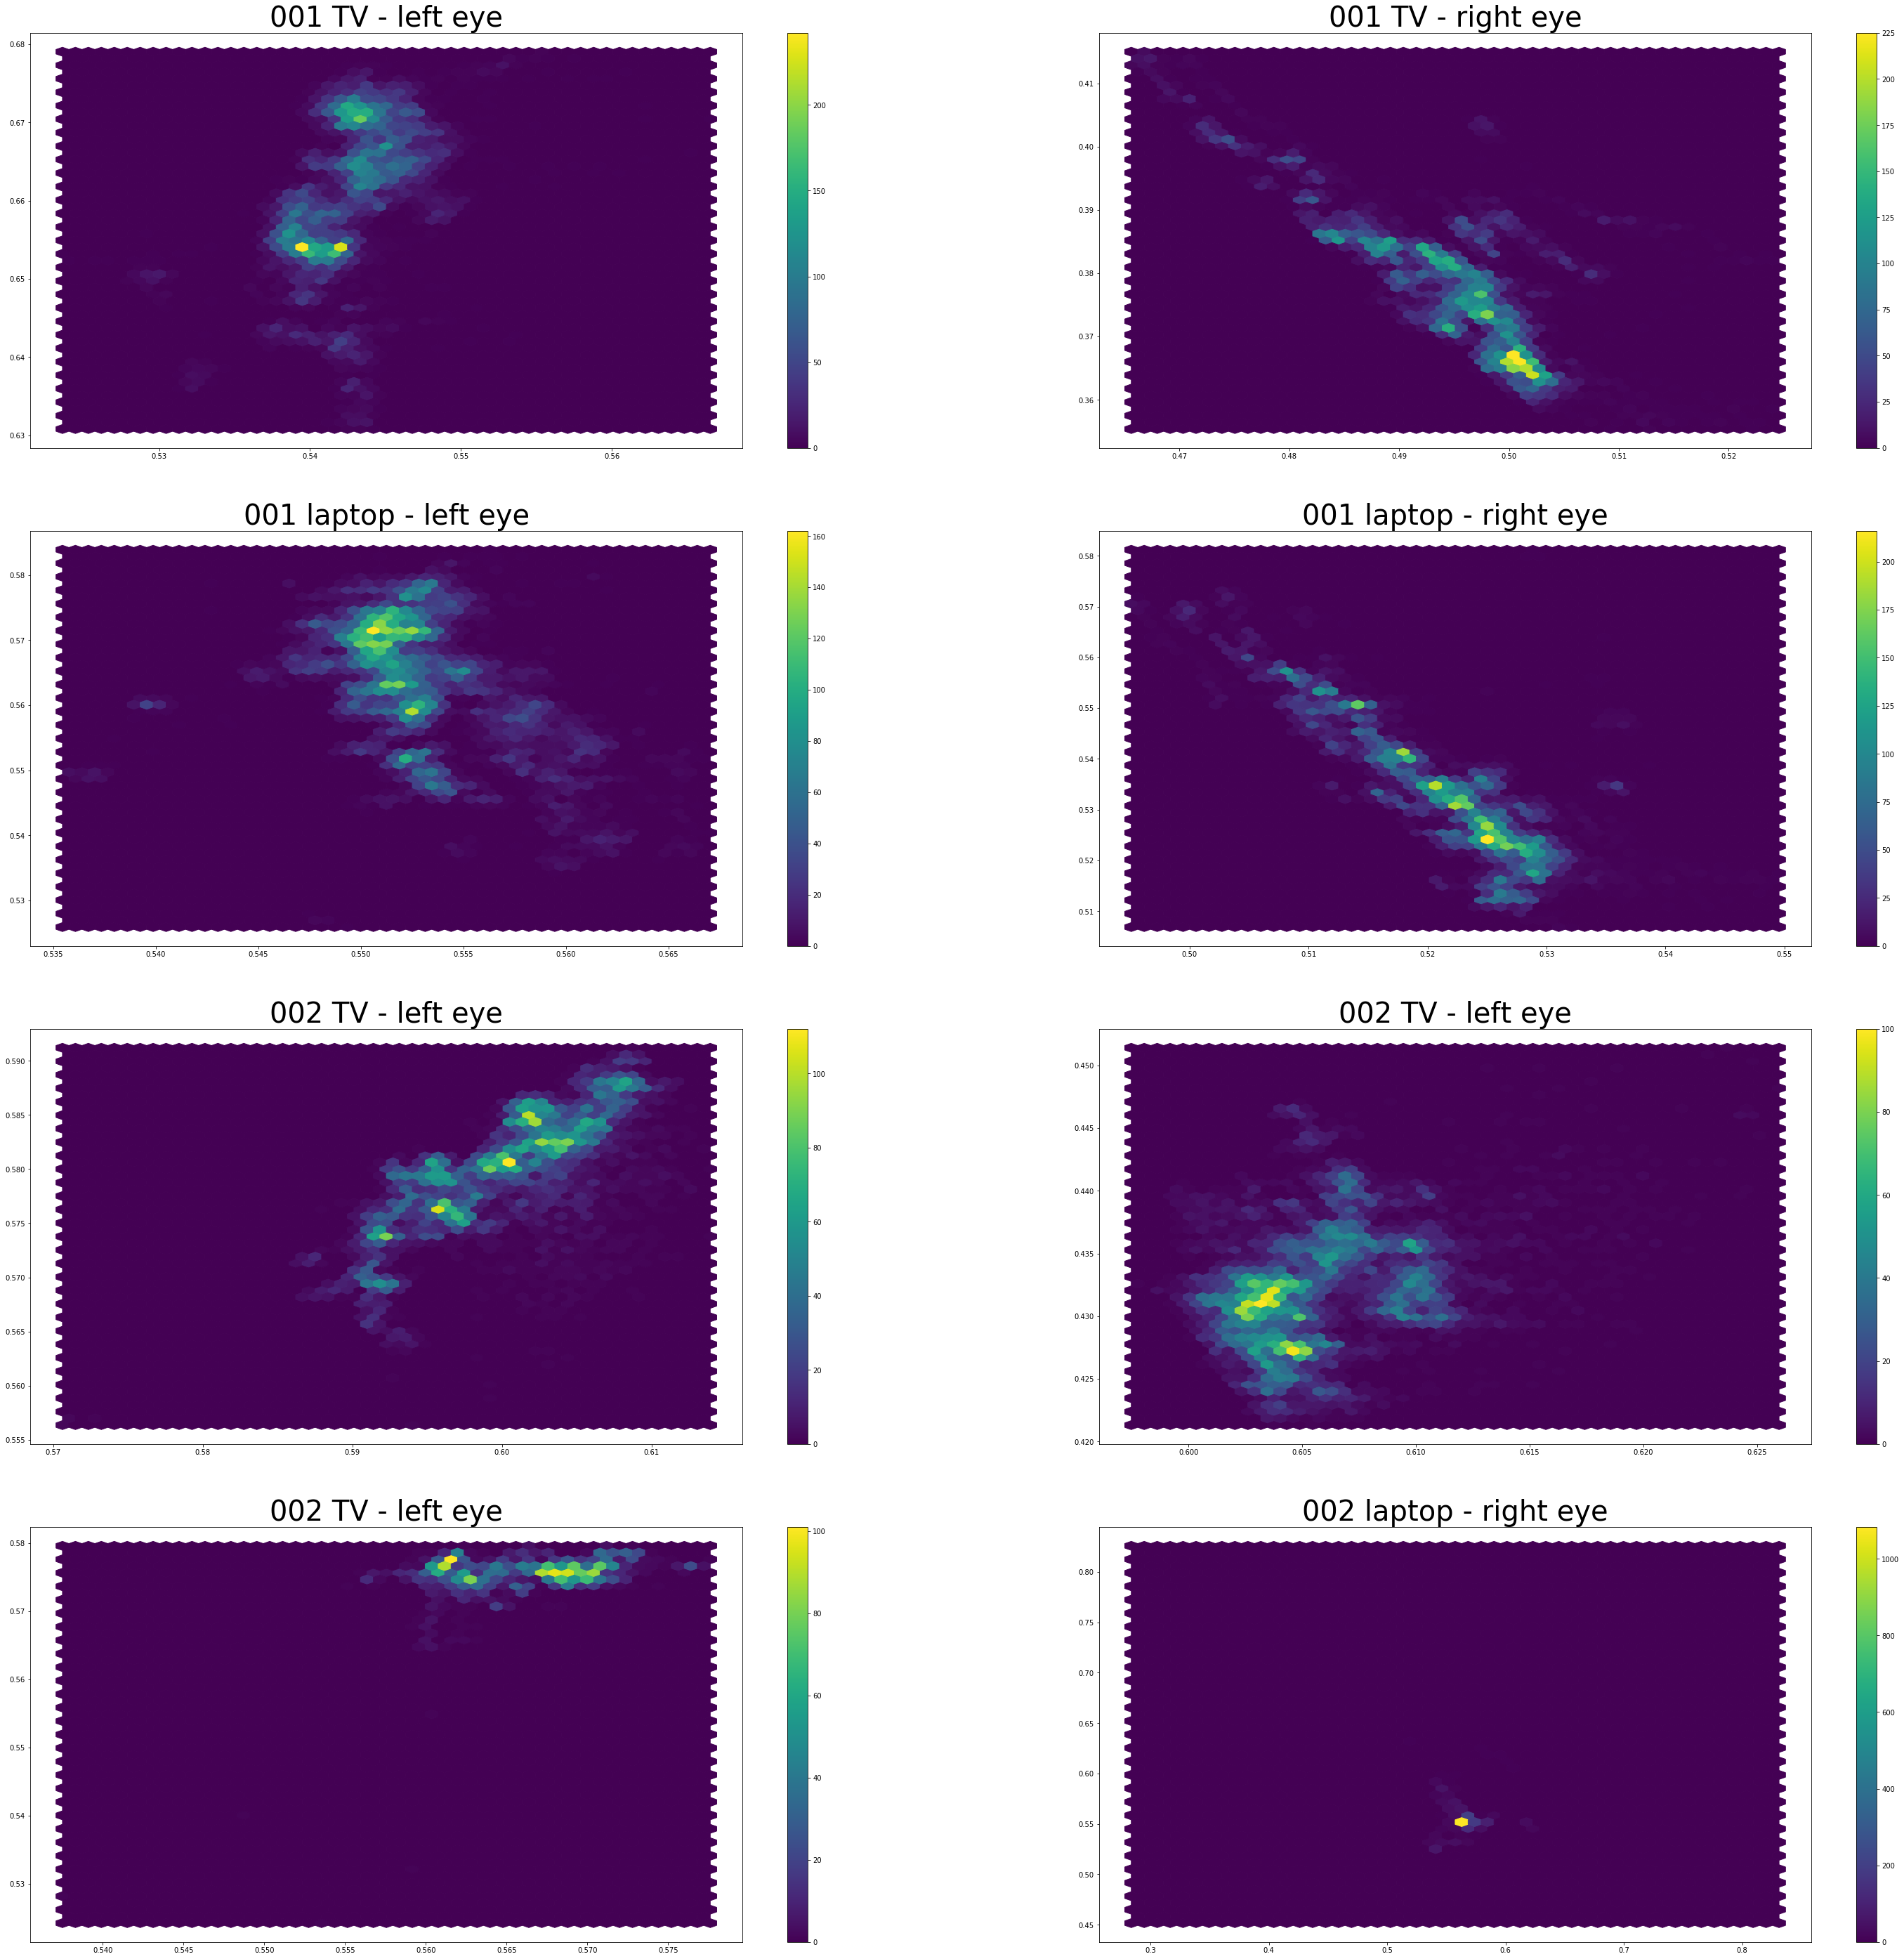

In [101]:
plt.figure(figsize=(50, 50))

#001 left eye TV
plt.subplot(4, 2, 1)
plt.hexbin(df_fixcross_001_tv['norm_pos_x'], df_fixcross_001_tv['norm_pos_y'], gridsize = 50)
plt.colorbar()
plt.title("001 TV - left eye", size = 40)

#001 right eye TV
plt.subplot(4, 2, 2)
plt.hexbin(df_fixcross_001_tv_r['norm_pos_x'], df_fixcross_001_tv_r['norm_pos_y'],gridsize = 50)
plt.colorbar()
plt.title("001 TV - right eye", size = 40)

#001 left eye laptop
plt.subplot(4, 2, 3)
plt.hexbin(df_fixcross_001_laptop['norm_pos_x'], df_fixcross_001_laptop['norm_pos_y'],gridsize = 50)
plt.colorbar()
plt.title("001 laptop - left eye", size = 40)

#001 right eye laptop
plt.subplot(4, 2, 4)
plt.hexbin(df_fixcross_001_laptop_r['norm_pos_x'], df_fixcross_001_laptop_r['norm_pos_y'],gridsize = 50)
plt.colorbar()
plt.title("001 laptop - right eye", size = 40)

#002 left eye TV
plt.subplot(4, 2, 5)
plt.hexbin(df_fixcross_002_tv['norm_pos_x'], df_fixcross_002_tv['norm_pos_y'],gridsize = 50)
plt.colorbar()
plt.title("002 TV - left eye", size = 40)

#002 right eye TV
plt.subplot(4, 2, 6)
plt.hexbin(df_fixcross_002_tv_r['norm_pos_x'], df_fixcross_002_tv_r['norm_pos_y'],gridsize = 50)
plt.colorbar()
plt.title("002 TV - left eye", size = 40)

#002 left eye laptop
plt.subplot(4, 2, 7)
plt.hexbin(df_fixcross_002_laptop['norm_pos_x'], df_fixcross_002_laptop['norm_pos_y'],gridsize = 50)
plt.colorbar()
plt.title("002 TV - left eye", size = 40)

#002 right eye laptop
plt.subplot(4, 2, 8)
plt.hexbin(df_fixcross_002_laptop_r['norm_pos_x'], df_fixcross_002_laptop_r['norm_pos_y'],gridsize = 50)
plt.colorbar()
plt.title("002 laptop - right eye", size = 40)


# This is the end of this notebook